This notebook contains all code used to make my thesis plots.

In [1303]:
from copy import deepcopy
from contextlib import contextmanager

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, MultipleLocator
from collections import namedtuple
from IPython.display import IFrame
import functools

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')


mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams['legend.numpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
from common_plots import *

In [4]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var

In [5]:
# Here get your dataframes.
# Extract dataframes from binary
store = pd.HDFStore("points_500_MICRO_SCAN_NTv491_HBv431_HSv140_largeRange_DMass2_fixAssignMass_19_May_16_1513.h5")
# df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly_ignorebctaunu_ignorechi2 #'relaxed' constraints - +ve g-2 and omegah^2

store.close()

Helper funcitons for saving plots with different backends easily:

In [1096]:
def get_backend():
    return list(get_ipython().magic(u"config InlineBackend.figure_formats"))

def set_backend(fmt):
    print 'Setting backend', fmt
    get_ipython().magic(u"config InlineBackend.figure_formats = '%s', " % fmt)

@contextmanager
def backend(fmt):
    old_fmt = get_backend()[0]
    set_backend(fmt)
    yield
#     set_backend(old_fmt)
    set_backend('png')

def save_fig(func):
    """Decorator func for easily saving plots in jupyter notebook.
    
    Just add in a filename=XXX to your normal function arguments.
    It will auto switch backends correctly.
    """
    def wrapper(*args, **kwargs):
        filename = kwargs['filename']
        if filename == '':
            raise IOError('No filename')
        if '.' not in filename:
            raise IOError('No extension in filename: %s' % filename)
        fmt = os.path.splitext(filename)[1].lstrip('.') if SAVE_PLOTS else 'png'
        with backend(fmt):
            new_kwargs = deepcopy(kwargs)
            del new_kwargs['filename']
            func(*args, **new_kwargs)
            if SAVE_PLOTS: 
                save_plot(filename)
    return wrapper


In [1094]:
SAVE_PLOTS = True

if SAVE_PLOTS:
    set_backend('png')
    mpl.rcParams['savefig.dpi'] = 100
else:
    set_backend('png')
    mpl.rcParams['savefig.dpi'] = 72

Setting backend png


In [1104]:
for k,v in mpl.rcParams.iteritems():
    if 'legend' in k.lower():
        print k, v

legend.labelspacing 0.5
legend.handletextpad 0.8
legend.framealpha 0.6
legend.isaxes True
legend.fontsize large
legend.scatterpoints 1
legend.shadow False
legend.frameon True
legend.markerscale 1.0
legend.fancybox False
legend.loc upper right
legend.borderpad 0.4
legend.handleheight 0.7
legend.numpoints 1
legend.handlelength 2.0
legend.borderaxespad 0.5
legend.columnspacing 2.0


In [6]:
df_pass_all_ma1 = subset_var(df_pass_all, 3.5, 10.5, 'ma1')

In [250]:
title = 'Relaxed constraints'
SIZE = 15

In [1034]:
@save_fig
def plot_ma1_inputparams(df, title):
    plot_input_params_scatters(df, 'ma1', r'$m_{a_1}\ \mathrm{[GeV]}$', 
                               yrange=[0, 20], title=title, cols=2, s=SIZE)

Setting backend png
Setting backend png


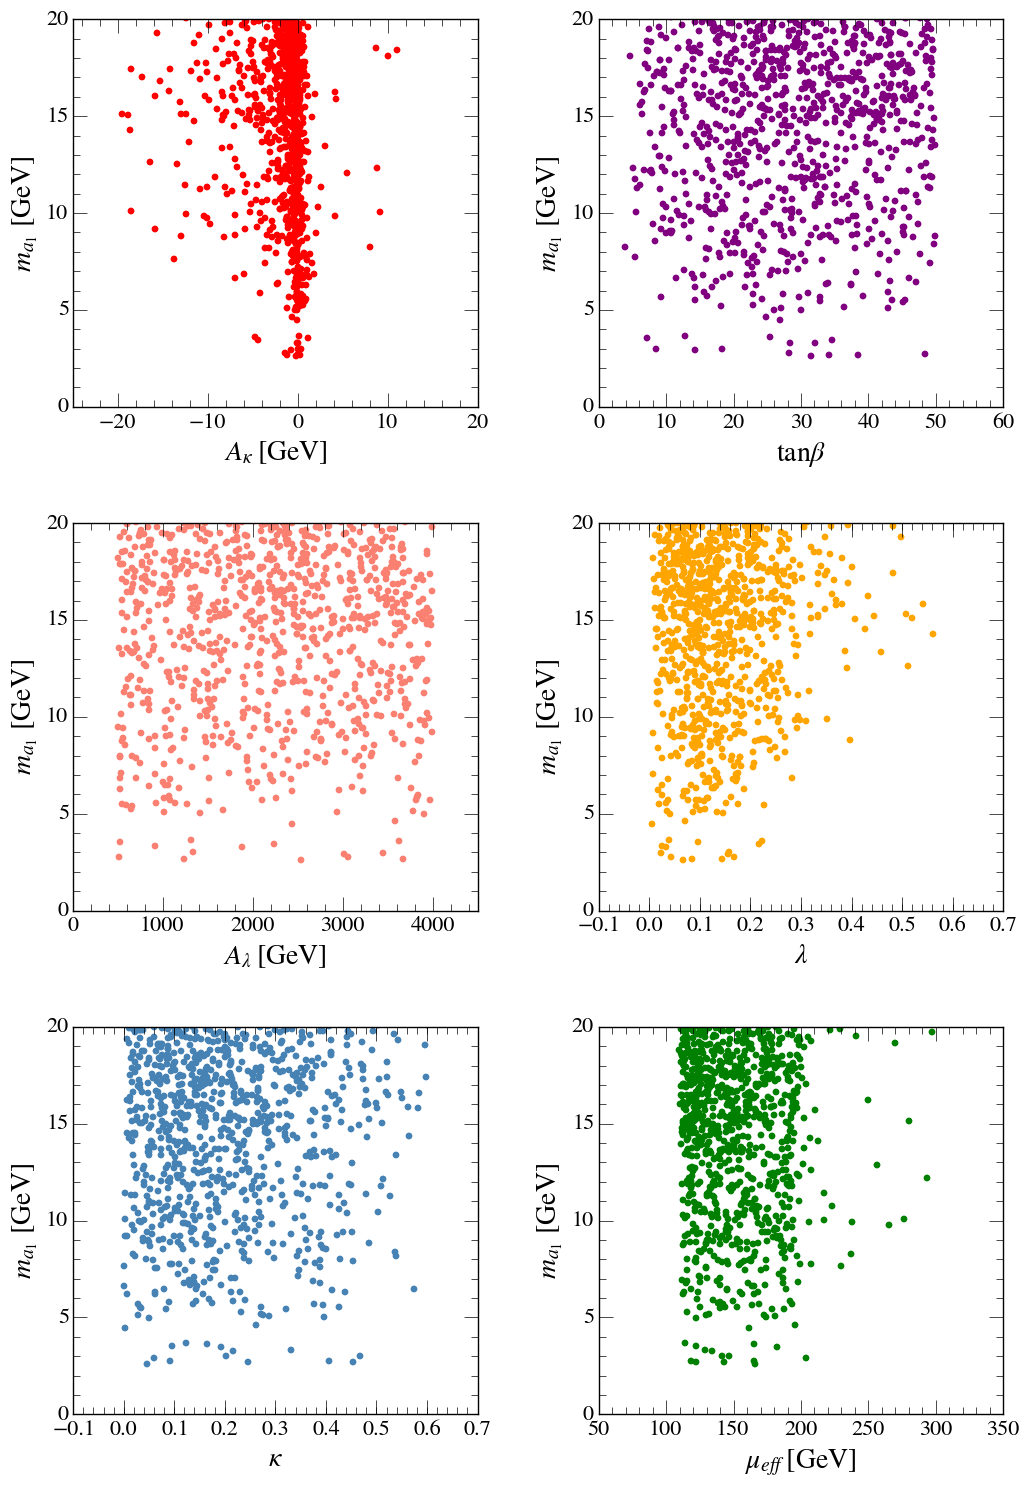

In [1035]:
plot_ma1_inputparams(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], 
                     title, filename='Thesis_plots/ma1_inputparams_relaxed.png')

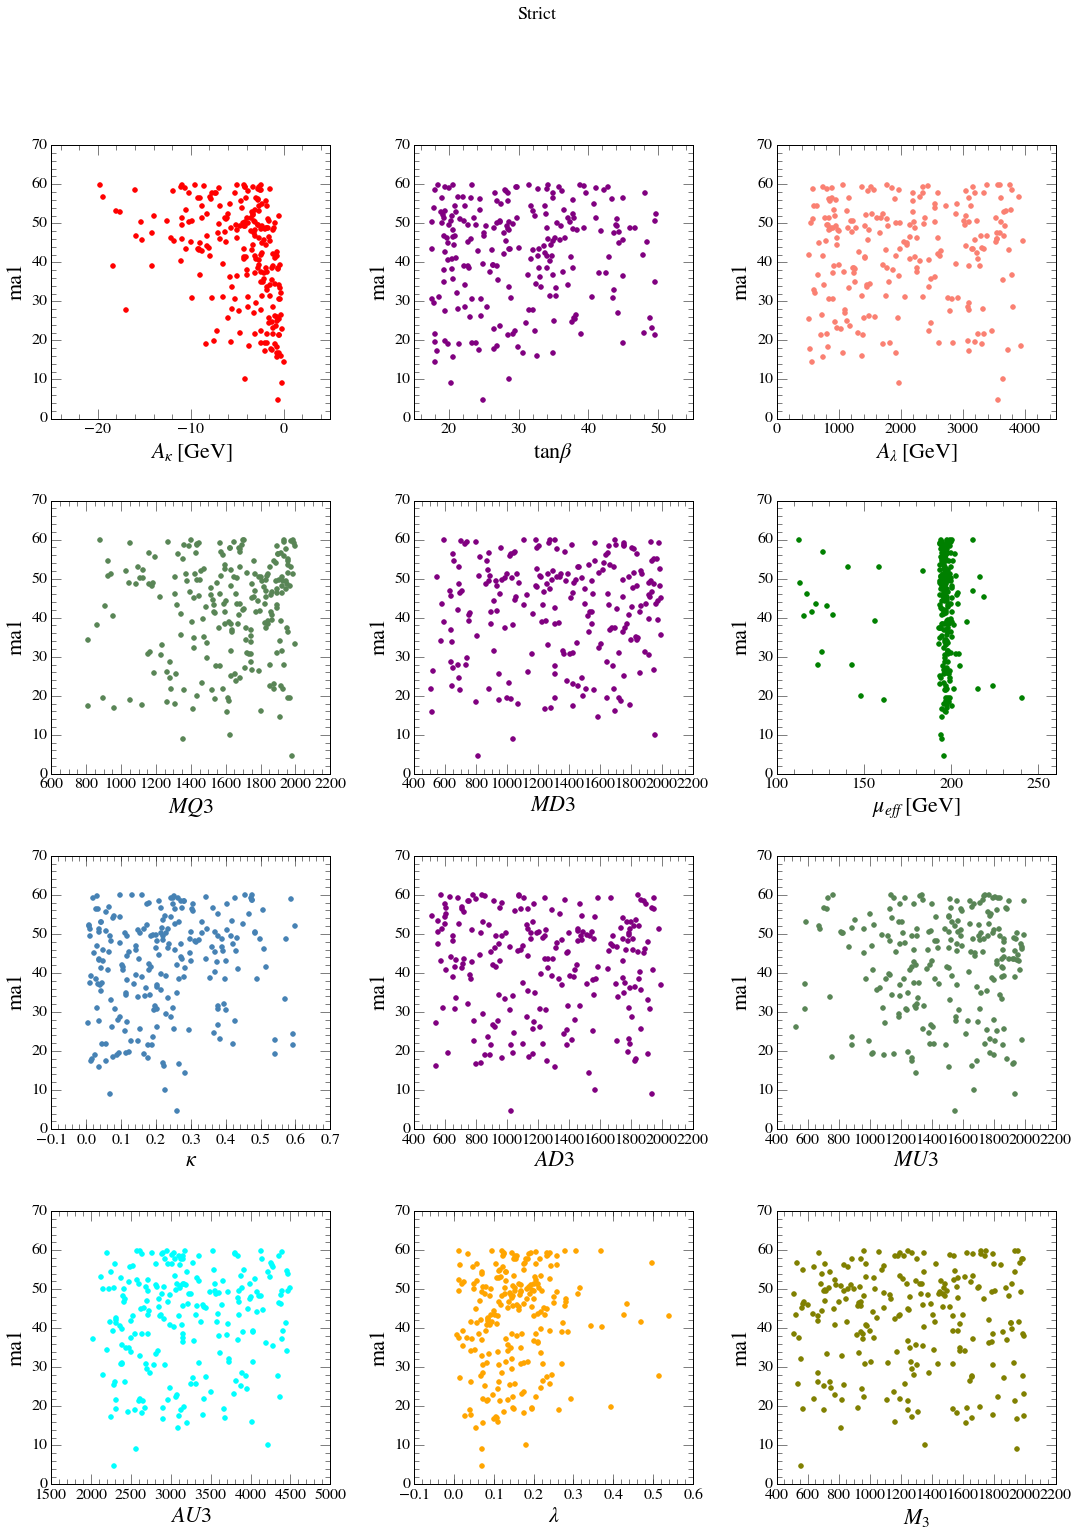

In [1375]:
plot_input_params_scatters(df_pass_all[df_pass_all.constraints == 'b -> c tau nu more than 2 sigma away (as SM)'], 
                           ylabel='ma1', title='Strict', yvar='ma1', param_dict=nmssm_params_extended)

Setting backend png
Setting backend png


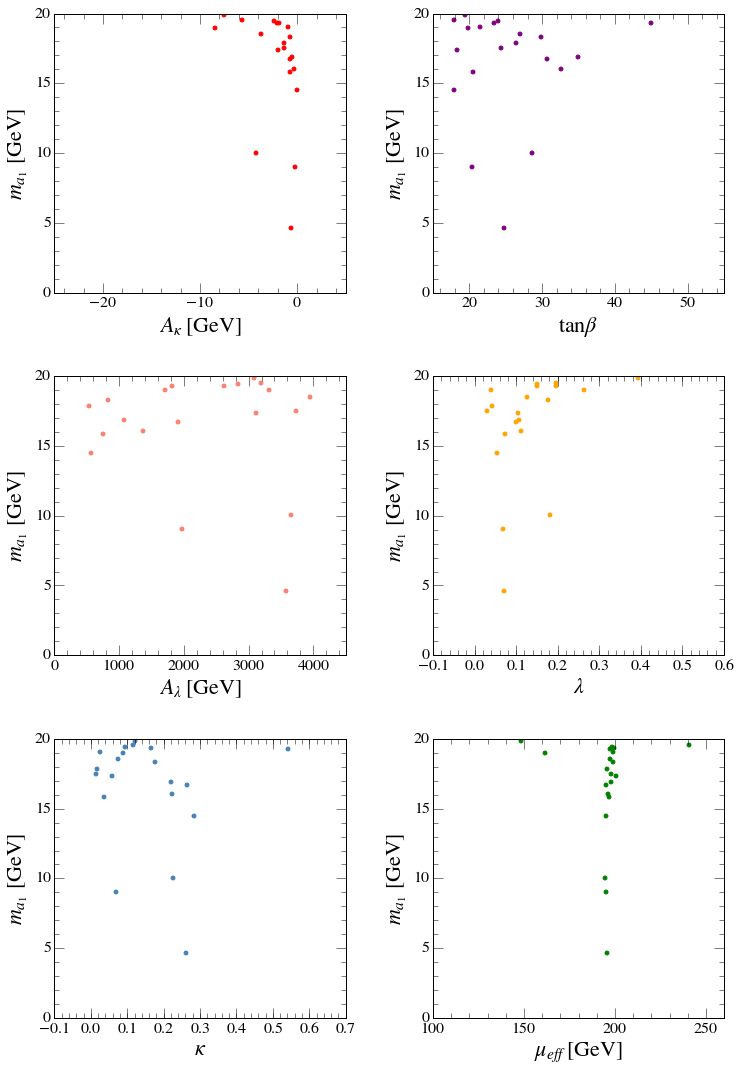

In [1372]:
plot_ma1_inputparams(df_pass_all[df_pass_all.constraints == 'b -> c tau nu more than 2 sigma away (as SM)'], 
                     title, filename='Thesis_plots/ma1_inputparams_strict.png')

In [1036]:
@save_fig
def plot_mh1_inputparams(df, title, yrange=[0, 150]):
    plot_input_params_scatters(df, 'mh1', r'$m_{h_1}\ \mathrm{[GeV]}$', 
                               yrange=yrange, 
                               title=title, cols=2, s=SIZE)

Setting backend png
Setting backend png


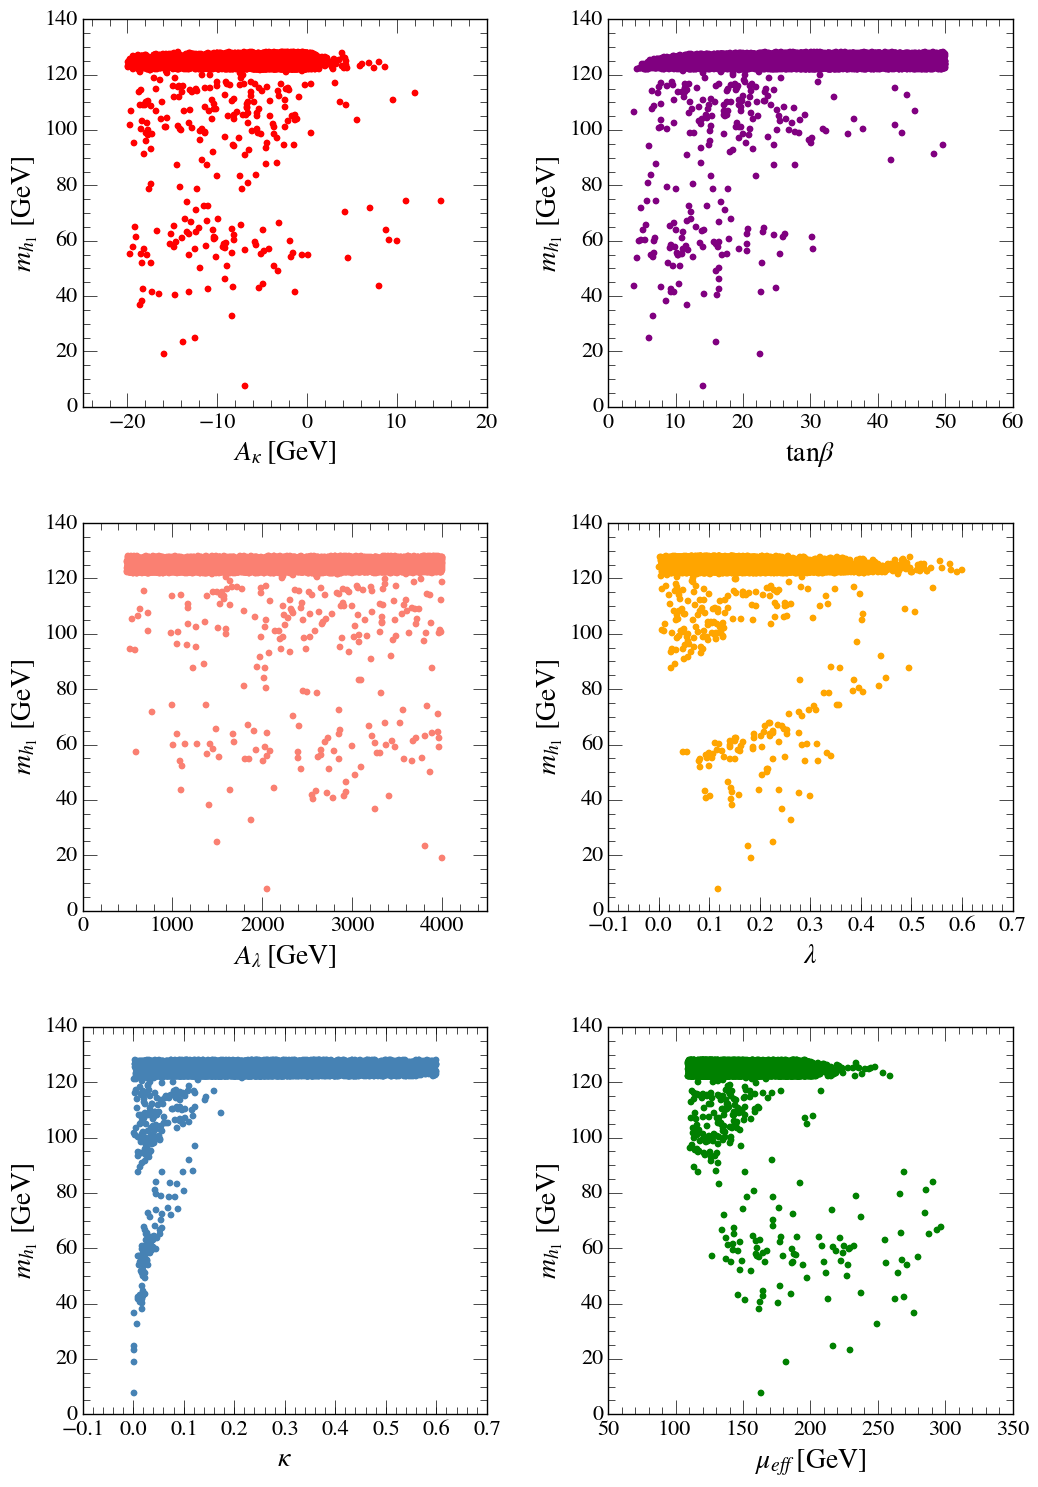

In [1037]:
plot_mh1_inputparams(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], 
                     title, filename='Thesis_plots/mh1_inputparams_relaxed_h125.png', yrange=[0, 140])

Setting backend png
Setting backend png


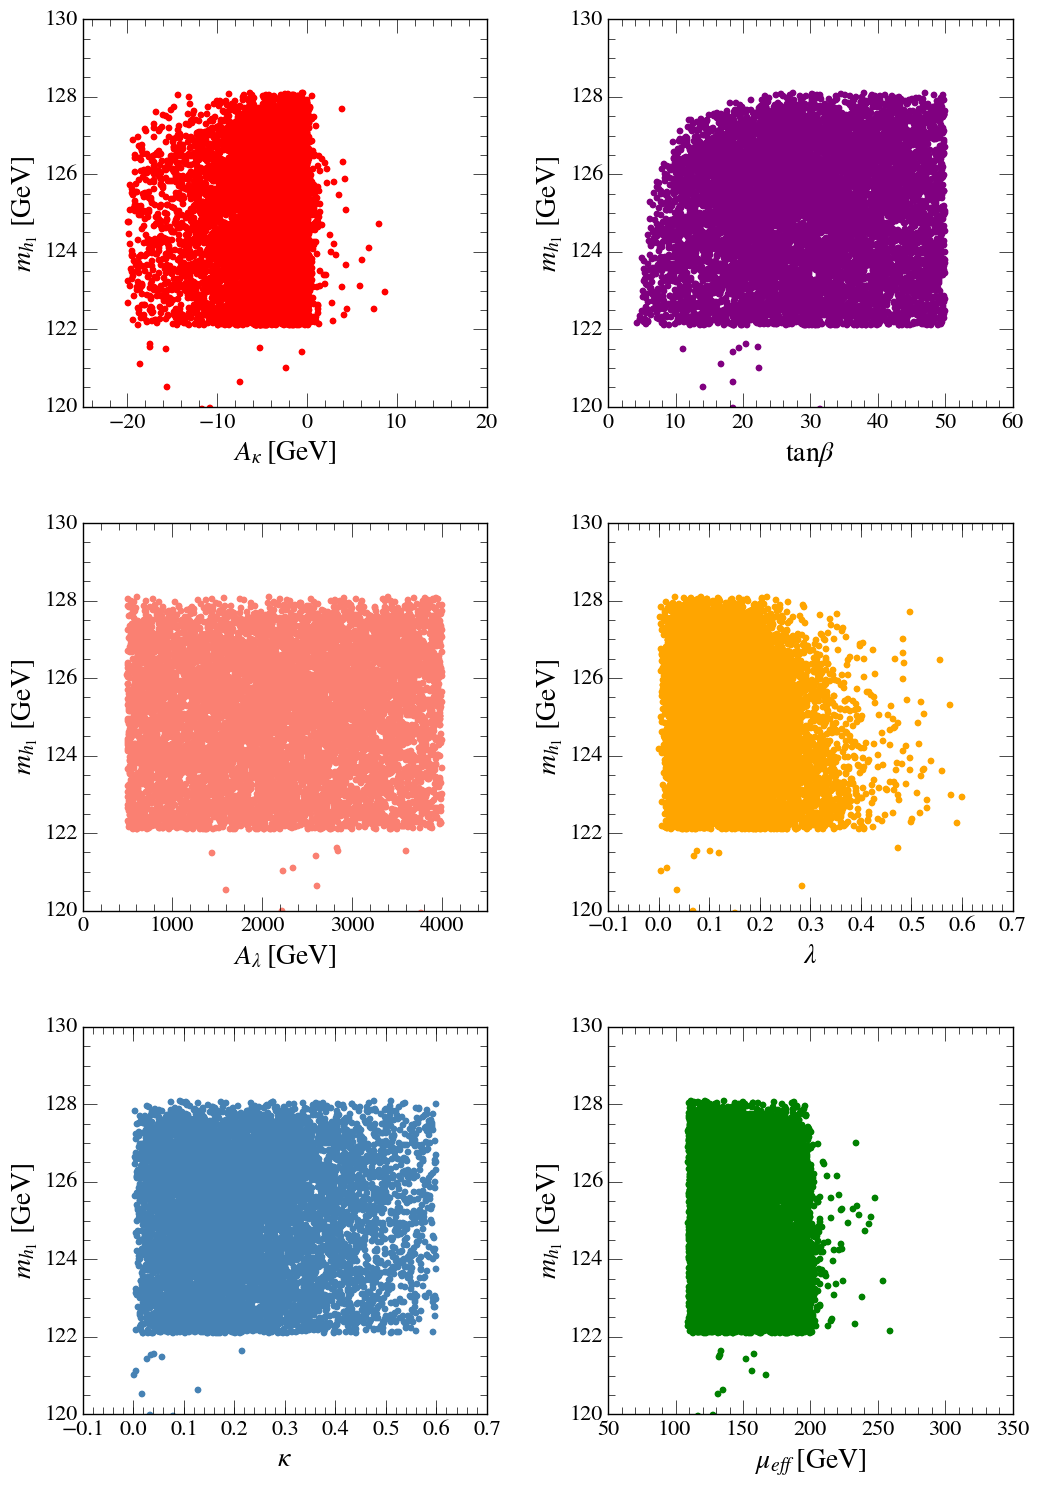

In [1038]:
plot_mh1_inputparams(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], 
                     title, filename='Thesis_plots/mh1_inputparams_relaxed.png', yrange=[120,130])

In [1040]:
@save_fig
def plot_mh2_inputparams(df, title):
    plot_input_params_scatters(df, 'mh2', r'$m_{h_2}\ \mathrm{[GeV]}$', 
                               yrange=[120, 140], 
                               title=title, cols=2, s=SIZE)

Setting backend png
Setting backend png


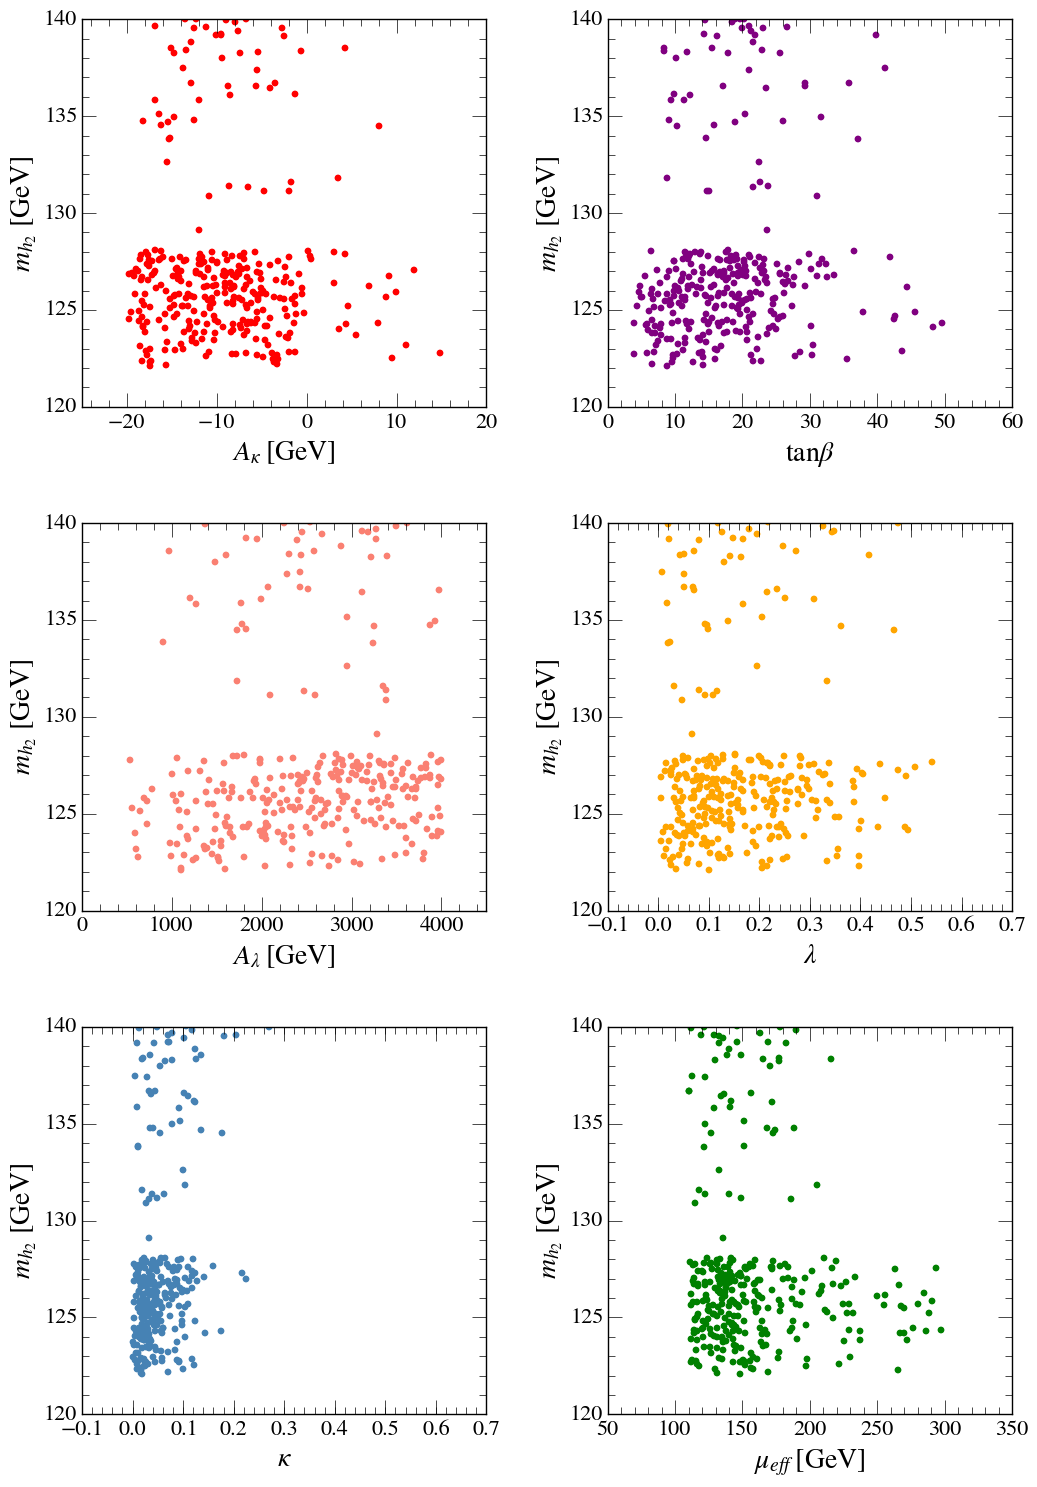

In [1041]:
plot_mh2_inputparams(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], 
                     title, filename='Thesis_plots/mh2_inputparams_relaxed.png')

In [256]:
title = ''

In [1042]:
@save_fig
def plot_mh1_ma1_scatter(df, title):
    plot_scatter(df=df, xvar='ma1', yvar='mh1', 
                 xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
                 ylabel=r'$m_{h_1}\ \mathrm{[GeV]}$',
                 color='dodgerblue', s=SIZE)
    plt.xlim(0, 60)
    plt.ylim(0, 140)
    plt.title(title)
    
    xmin, xmax = plt.xlim()
    ymin, ymax = xmin, xmax
    plt.plot([xmin, xmax], [ymin, ymax], linestyle='dashed', 
             label=r'$m_{h_1} =\ m_{a_1}$', linewidth=2)

#     plt.plot([xmin, xmax], [2*ymin, 2*ymax], linestyle='dashed', color='red',
#              label=r'$m_{h_1} =\ 2m_{a_1}$', linewidth=2)

#     plt.plot([xmin, xmax], [62.5, 62.5], linestyle='dashed', color='purple',
#              label=r'$m_{h_1} =\ 62.5\ \mathrm{GeV}$', linewidth=2)

    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'Y', color='k', alpha=1, fill=False,
                          label=r'$125 \pm 3\ \mathrm{GeV}$', hatch='xxx')
    
#     make_highlight_region(plt.gca(), [0, 62.5], 
#                           'Y', color='darkorchid', alpha=0.25, fill=True,
#                           label=r'$h_2 \to 2h_1\ \mathrm{allowed}$')

#     poly = patches.Polygon([[0, 0], [60, 0], [60, 62.5], [62.5/2, 62.5]], closed=True, 
    poly = patches.Polygon([[0, 0], [60, 0], [60, 62.5], [0, 62.5]], closed=True, 
                           color='darkorchid', fill=True, hatch='//', 
                           label=r'$h_2 \to 2h_1\ \mathrm{allowed}$', alpha=0.25)
    plt.gca().add_patch(poly)
    
    poly2 = patches.Polygon([[0, 0], [62.5/2, 62.5], [0, 62.5]], closed=True, 
                           fill=True, color='red', hatch=r"\\",
                           label=r'$h_2 \to 2h_1 \to 4a_1\ \mathrm{allowed}$', alpha=0.25)
    plt.gca().add_patch(poly2)

#     make_highlight_region(plt.gca(), [0, 62.5], 
#                           'Y', color='purple', alpha=0.2,
#                           label=r'$h_2 \to 2h_1\ \mathrm{allowed}$')

    plt.legend(loc='lower right', frameon=True, bbox_to_anchor=(1,0), framealpha=0.8, fontsize=14)
    plt.tight_layout()


Setting backend png
Setting backend png


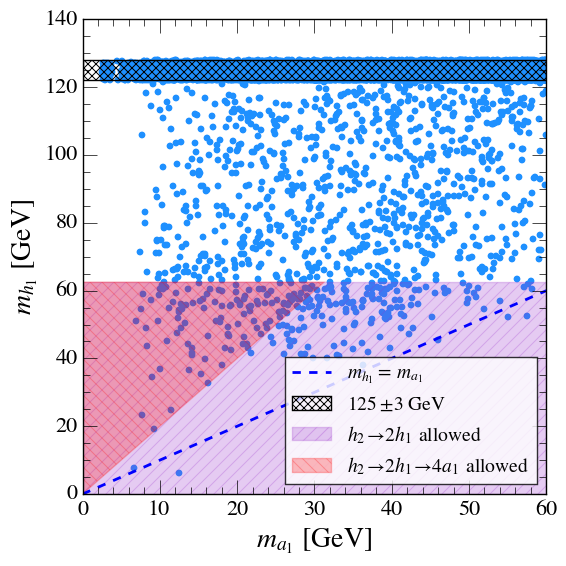

In [1043]:
plot_mh1_ma1_scatter(df_pass_all, title, filename='Thesis_plots/mh1_ma1_relaxed.png')

(<matplotlib.axes._subplots.AxesSubplot at 0x10ca32dd0>,
 <matplotlib.collections.PathCollection at 0x10c9aabd0>)

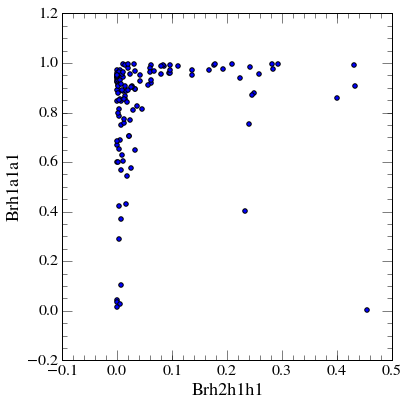

In [324]:
plot_scatter(df=df_pass_all.query('mh2 < 128.1'), xvar='Brh2h1h1', yvar='Brh1a1a1')

In [334]:
dff = df_pass_all.query('mh2<128.1')
nu_tautau =  dff['xsec_8_ggf_h2_2h1_4b'] * dff['Brh1a1a1'] * dff['Brh1a1a1'] * dff['Bra1tautau'] * dff['Bra1tautau'] / (dff['Brh1bb'] * dff['Brh1bb'])
nu_tautau = nu_tautau.dropna()

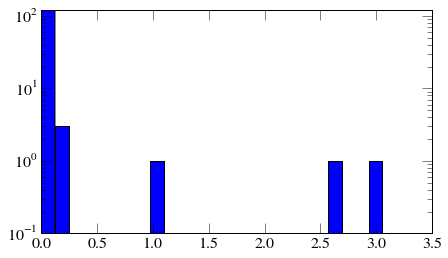

In [342]:
plt.hist(nu_tautau.values, bins=25)
plt.ylim(bottom=0.1)
plt.yscale('log')

In [343]:
dff = df_pass_all.query('mh2<128.1')
nu_bb =  dff['xsec_8_ggf_h2_2h1_4b'] * dff['Brh1a1a1'] * dff['Brh1a1a1'] * dff['Bra1bb'] * dff['Bra1bb'] / (dff['Brh1bb'] * dff['Brh1bb'])
nu_bb = nu_bb.dropna()

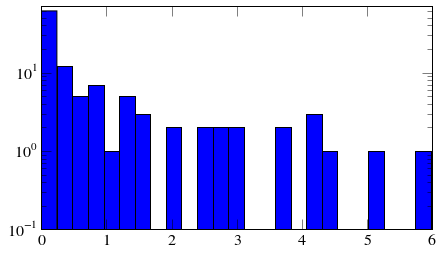

In [344]:
plt.hist(nu_bb.values, bins=25)
plt.ylim(bottom=0.1)
plt.yscale('log')

In [1044]:
@save_fig
def plot_mh2_ma1_scatter(df, title):
    plot_scatter(df=df, xvar='ma1', yvar='mh2', 
                 xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
                 ylabel=r'$m_{h_2}\ \mathrm{[GeV]}$', 
                 color='green', s=SIZE)
    plt.xlim(0, 60)
    plt.ylim(80, 320)
#     plt.yscale('log')
    plt.title(title)
    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'Y', color='k', alpha=1, fill=False, hatch="xxx", 
                          label=r'$125 \pm 3\ \mathrm{GeV}$')
    plt.legend(loc='lower right', frameon=False)
    plt.tight_layout()


Setting backend png
Setting backend png


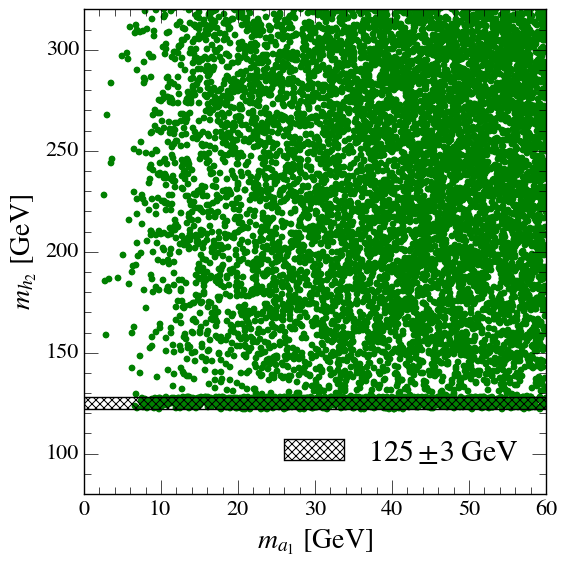

In [1045]:
plot_mh2_ma1_scatter(df_pass_all, title, filename='Thesis_plots/mh2_ma1_relaxed.png')

In [1046]:
@save_fig
def plot_mh2_mh1_scatter(df, title):
    plot_scatter(df=df, xvar='mh1', yvar='mh2', 
                 xlabel=r'$m_{h_1}\ \mathrm{[GeV]}$', 
                 ylabel=r'$m_{h_2}\ \mathrm{[GeV]}$',
                 color='red', s=SIZE)
    plt.xlim(0, 140)
    plt.ylim(80, 320)
    
    xmin, xmax = plt.xlim()
    ymin, ymax = xmin, xmax
    plt.plot([xmin, xmax], [ymin, ymax], linestyle='dashed', 
             label=r'$m_{h_2} =\ m_{h_1}$', linewidth=2)

    plt.title(title)
    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'X', color='k', alpha=1, fill=False, hatch='xxx')
    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'Y', color='k', alpha=1, fill=False, hatch='xxx', 
                          label=r'$125 \pm 3\ \mathrm{GeV}$')
    plt.legend(loc='upper left', frameon=False)
    plt.tight_layout()

Setting backend png
Setting backend png


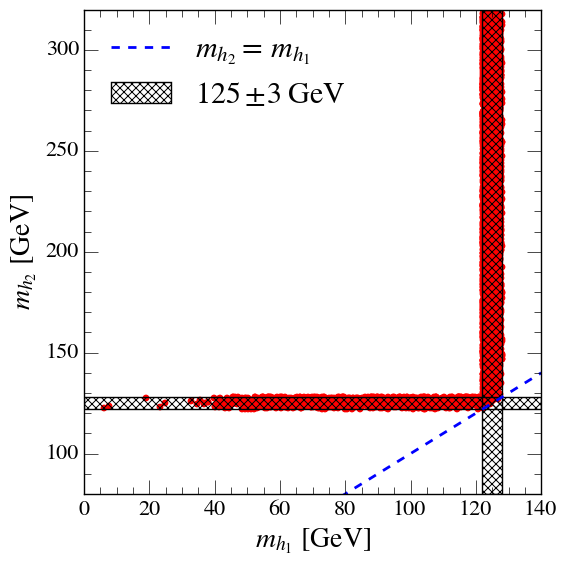

In [1047]:
plot_mh2_mh1_scatter(df_pass_all, title, filename='Thesis_plots/mh2_mh1_relaxed.png')

In [1048]:
import math

def plot_contours(ax, xlim=[0, 1], ylim=[0, 1], n_div=15, log_steps=False):
    """For contours of constant BR * ggh^2"""
    delta = min(xlim[1], ylim[1])/40.
    # generate a grid of x and y values
    x = np.arange(xlim[0], xlim[1]+delta, delta)
    y = np.arange(ylim[0], ylim[1]+delta, delta)
    X, Y = np.meshgrid(x, y)
    # generate a grid of the product of these values
    Z = X * Y

    if log_steps:
        max_v = xlim[1] * ylim[1]
        min_v = xlim[0] * ylim[0]
        print math.log(max_v, 10)-5, math.log(max_v, 10)+1
        n_div = np.logspace( math.log(max_v, 10)-5, math.log(max_v, 10)+1, num=7)

    manual_locations = [(math.sqrt(x), math.sqrt(x)) for x in n_div]
    manual_locations[-1] = (0.55, n_div[-1]/0.55)
    CS = ax.contour(X, Y, Z, n_div, colors='k')
    ax.clabel(CS, inline=1, fontsize=16, fmt='%g', manual=manual_locations)


@save_fig    
def plot_grc2_br(df, mass_range, title):
    fig, ax = generate_fig_axes(size=(8,7))

    n_div = [1E-2, 2E-2, 5E-2, 1E-1, 2E-1, 5E-1]
    plot_contours(plt.gca(), n_div=n_div)

    F = 3

    df = df.query('%f<ma1<%f' % (mass_range[0], mass_range[1]))
    plot_scatter(ax=ax, df=df.query('122.1 < mh1 < 128.1 & mh2>128.1'), 
                 xvar='h1ggrc2', yvar='Brh1a1a1', color='blue', 
                 label=r'$h_{125} = h_1,\ h_i = h_1,\ X = a_1$',
                 marker='s', s=F*SIZE, alpha=0.75)
    plot_scatter(ax=plt.gca(), df=df.query('122.1 < mh2 < 128.1'), 
                 xvar='h2ggrc2', yvar='Brh2a1a1', color='red', 
                 label=r'$h_{125} = h_2,\ h_i = h_2,\ X = a_1$',
                 marker='o', s=F*SIZE, alpha=0.95)
    plot_scatter(ax=plt.gca(), df=df.query('122.1 < mh1 < 128.1 & mh2>128.1'), 
                 label=r'$h_{125} = h_1,\ h_i = h_2,\ X = a_1$',
                 xvar='h2ggrc2', yvar='Brh2a1a1', color='purple', 
                 marker='s', s=F*SIZE, alpha=0.75)
    plot_scatter(ax=plt.gca(), df=df.query('122.1 < mh2 < 128.1'), 
                 label=r'$h_{125} = h_2,\ h_i = h_1,\ X = a_1$',
                 xvar='h1ggrc2', yvar='Brh1a1a1', color='green', 
                 marker='o', s=F*SIZE, alpha=0.95)

    plot_scatter(ax=plt.gca(), df=df.query('%f<mh1<%f & 122.1 < mh2 < 128.1' % (mass_range[0], mass_range[1])), 
                 label=r'$h_{125} = h_2,\ h_i = h_2,\ X = h_1$',
                 xvar='h2ggrc2', yvar='Brh2h1h1', color='orange', 
                 marker='^', s=F*SIZE, alpha=0.95)

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)


    plt.xlabel(r'$g_{ggh_i}^2$')
    plt.ylabel(r'$BR(h_i \to XX)$')

    plt.legend(loc='upper right', fontsize=15, framealpha=0.85, frameon=False)

    plt.title(title)
    plt.tight_layout()

In [967]:
low_mass_title = r'$m_{X} < 10.5\ \mathrm{GeV}$'
hi_mass_title = r'$12 < m_{X} < 62\ \mathrm{GeV}$'

Setting backend pdf
Setting backend png


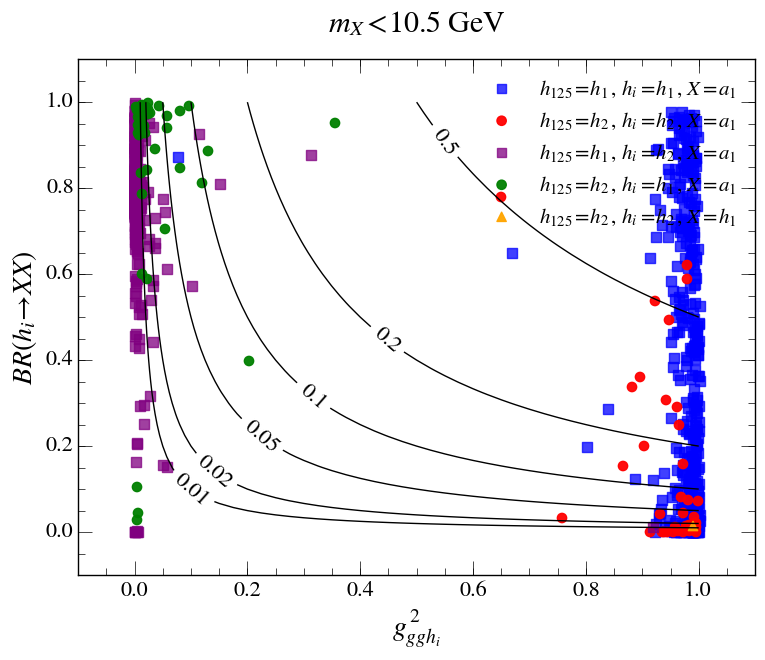

In [1049]:
plot_grc2_br(df_pass_all, [0, 10.5], low_mass_title, filename='Thesis_plots/rc2_br_ma1Lt10p5.pdf')

Setting backend pdf
Setting backend png


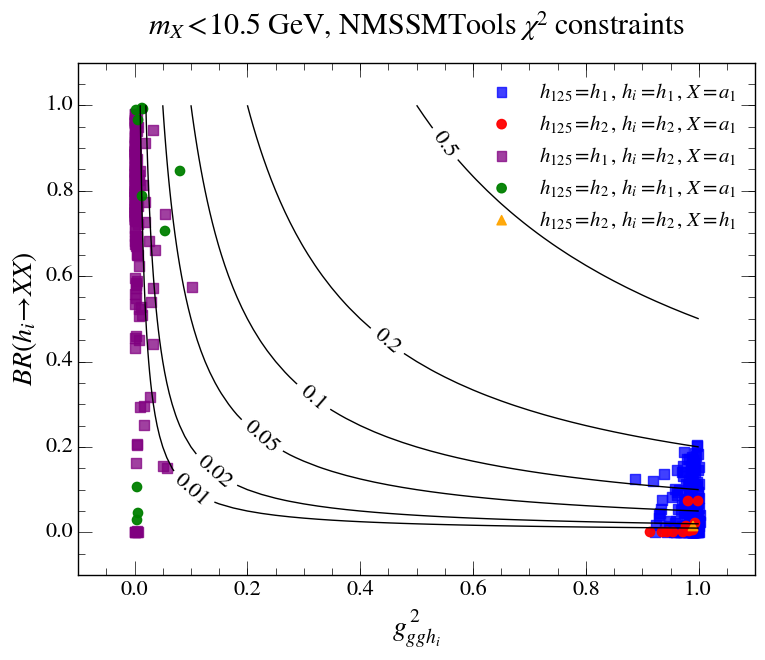

In [1050]:
plot_grc2_br(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], [0, 10.5], 
             low_mass_title + ", NMSSMTools " + r'$\chi^2$' + 'constraints', 
             filename='Thesis_plots/rc2_br_ma1Lt10p5_NT.pdf')

Setting backend pdf
Setting backend png


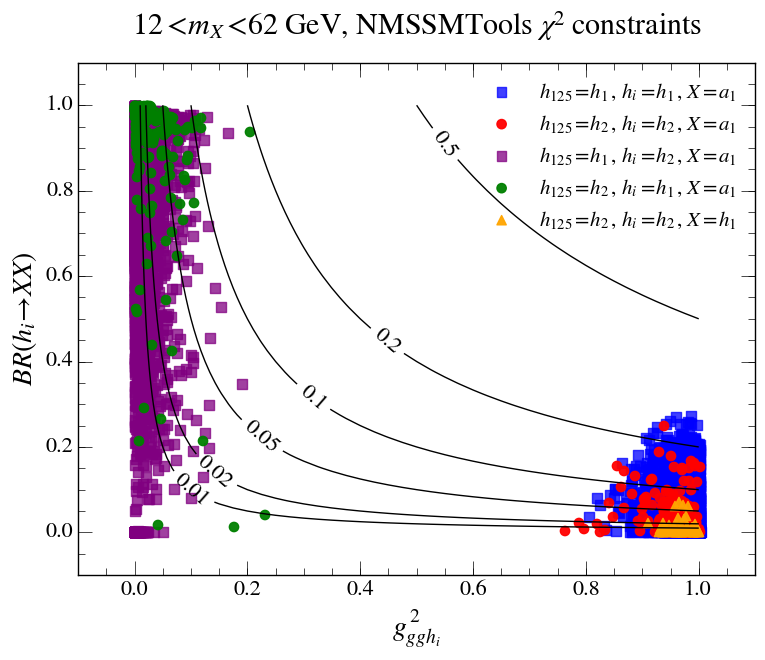

In [1051]:
plot_grc2_br(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], [12, 62], 
             hi_mass_title + ", NMSSMTools " + r'$\chi^2$' + 'constraints', 
             filename='Thesis_plots/rc2_br_ma1Gt12_NT.pdf')

Setting backend pdf
Setting backend png


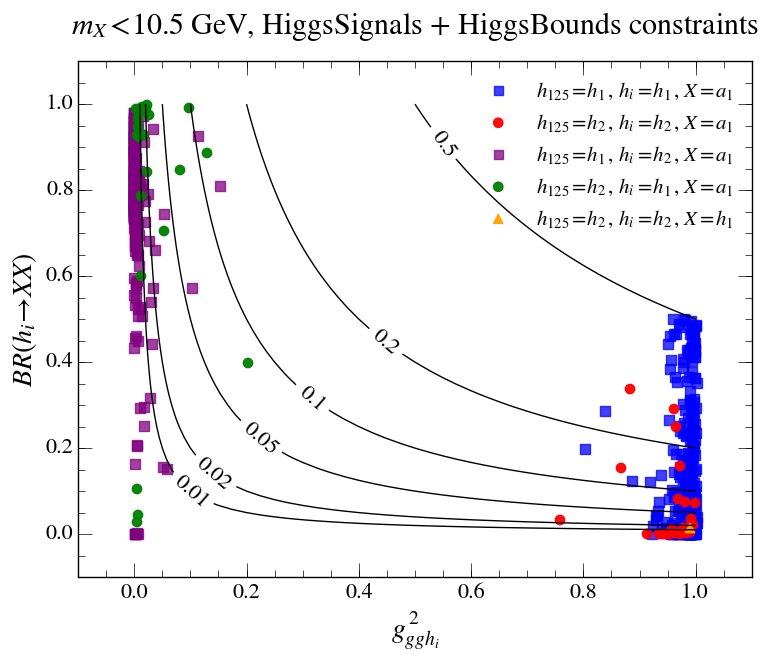

In [1052]:
plot_grc2_br(df_pass_all.query('HSprob>0.05 & HBresult==1'), [0, 10.5],
             low_mass_title + ', HiggsSignals + HiggsBounds constraints', 
             filename='Thesis_plots/rc2_br_ma1Lt10p5_HSHB.pdf')

Setting backend pdf
Setting backend png


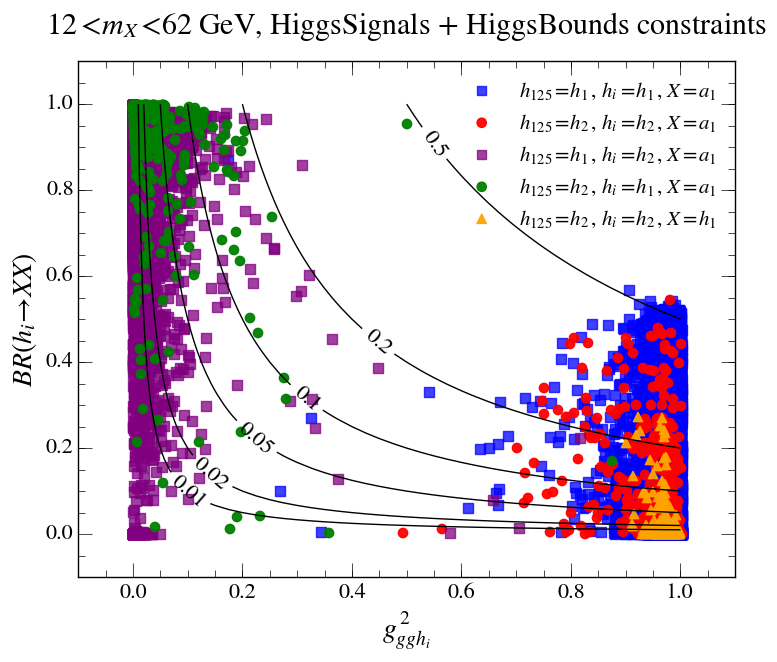

In [1053]:
plot_grc2_br(df_pass_all.query('HSprob>0.05 & HBresult==1'), [12, 62],
             hi_mass_title + ', HiggsSignals + HiggsBounds constraints', 
             filename='Thesis_plots/rc2_br_ma1Gt12_HSHB.pdf')

In [1260]:
@save_fig
def plot_h1BR_NT_HSHB(df, title, var, xlim, xlabel):
    df = df.query('122.2 < mh1 < 128.1 & mh2>128.1 & ma1<10.5')

    nbins = 50
    lw = 1
    norm = False
    err = False
    
    pass_zz = ~df.constraints.str.contains('ZZ')
    plot_histogram(df=df[pass_zz], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$ZZ\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_bb = ~df.constraints.str.contains('bb')
    plot_histogram(ax=plt.gca(), df=df[pass_bb], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$b\bar{b}\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_gg = ~df.constraints.str.contains('gg')
    plot_histogram(ax=plt.gca(), df=df[pass_gg], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$\gamma\gamma\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm, color='purple')

    pass_nt = ~df.constraints.str.contains('chi2')
    plot_histogram(ax=plt.gca(), df=df[pass_nt], var=var, bins=nbins, range=xlim, 
                   label='Pass NT all '+r'$\chi^2$', histtype='step', linewidth=2*lw, 
                   errorbars=err, normed=norm, color='darkorange', linestyle='dashed')

    pass_HBHS = (df.HBresult==1) & (df.HSprob>0.05)
    plot_histogram(ax=plt.gca(), df=df[pass_HBHS], var=var, bins=nbins, range=xlim, 
                   label='Pass HS + HB', histtype='step', linewidth=lw,
                   errorbars=False, normed=norm)

    plt.xlabel(xlabel)
    plt.xlim(*xlim)
#     plt.ylim(1, 5E4)
    plt.yscale('log')
    plt.legend(loc='best', fontsize=16, frameon=False)

Setting backend pdf
Setting backend png


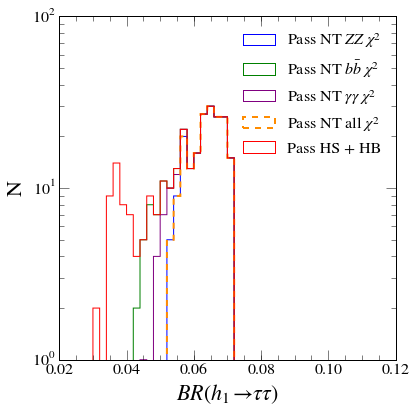

In [1262]:
plot_h1BR_NT_HSHB(df_pass_all, title='', var='Brh1tautau', 
                  xlim=[0.02, .12], xlabel=r'$BR(h_1 \to \tau\tau)$', 
                  filename='Thesis_plots/h1tautau_NT_HSHB.pdf')

Setting backend pdf
Setting backend png


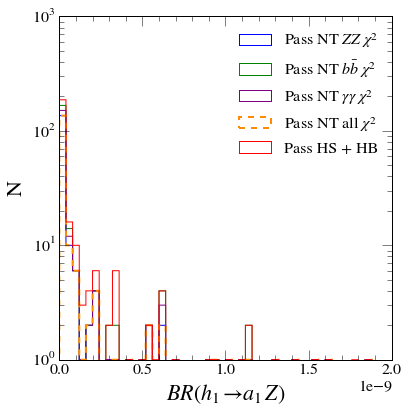

In [1268]:
plot_h1BR_NT_HSHB(df_pass_all, title='', var='Brh1a1z', 
                  xlim=[0, 2E-9], xlabel=r'$BR(h_1 \to a_1Z)$', 
                  filename='Thesis_plots/h1a1z_NT_HSHB.pdf')

Setting backend pdf
Setting backend png


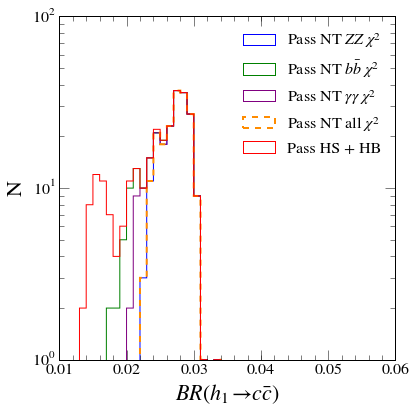

In [1270]:
plot_h1BR_NT_HSHB(df_pass_all, title='', var='Brh1cc', 
                  xlim=[0.01, 6E-2], xlabel=r'$BR(h_1 \to c\bar{c})$', 
                  filename='Thesis_plots/h1cc_NT_HSHB.pdf')

In [1237]:
@save_fig
def plot_h1zz_NT_HSHB(df, title):
    df = df.query('122.2 < mh1 < 128.1 & mh2>128.1 & ma1<10.5')

    var = 'Brh1zz'
    nbins = 30
    xlim = [0, 6E-2]
    lw = 1
    norm = False
    err = False
    
    pass_zz = ~df.constraints.str.contains('ZZ')
    plot_histogram(df=df[pass_zz], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$ZZ\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_bb = ~df.constraints.str.contains('bb')
    plot_histogram(ax=plt.gca(), df=df[pass_bb], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$b\bar{b}\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_gg = ~df.constraints.str.contains('gg')
    plot_histogram(ax=plt.gca(), df=df[pass_gg], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$\gamma\gamma\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm, color='purple')

    pass_nt = ~df.constraints.str.contains('chi2')
    plot_histogram(ax=plt.gca(), df=df[pass_nt], var=var, bins=nbins, range=xlim, 
                   label='Pass NT all '+r'$\chi^2$', histtype='step', linewidth=2*lw, 
                   errorbars=err, normed=norm, color='darkorange', linestyle='dashed')

    pass_HBHS = (df.HBresult==1) & (df.HSprob>0.05)
    plot_histogram(ax=plt.gca(), df=df[pass_HBHS], var=var, bins=nbins, range=xlim, 
                   label='Pass HS + HB', histtype='step', linewidth=lw,
                   errorbars=False, normed=norm)
    
    plt.xlabel(r'$BR(h_1 \to ZZ)$')
    plt.xlim(*xlim)
    plt.legend(loc='best', fontsize=16, frameon=False)
#     plt.ylim(1, 2E3)
    plt.yscale('log')

Setting backend pdf
Setting backend png


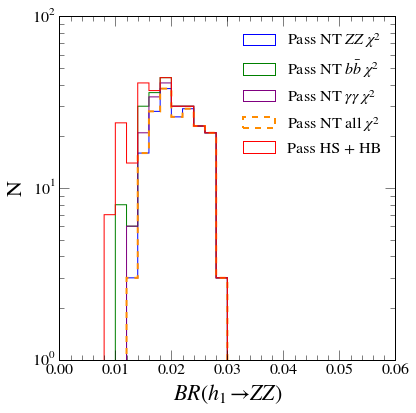

In [1265]:
plot_h1zz_NT_HSHB(df_pass_all, '', filename='Thesis_plots/h1zz_NT_HSHB.pdf')

In [1243]:
@save_fig
def plot_h1bb_NT_HSHB(df, title):
    df = df.query('122.2 < mh1 < 128.1 & mh2>128.1 & ma1<10.5')

    var = 'Brh1bb'
    xlim = [0.2, 0.7]
    nbins = 25
    lw = 1
    norm = False
    err = False
    
    pass_zz = ~df.constraints.str.contains('ZZ')
    plot_histogram(df=df[pass_zz], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$ZZ\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_bb = ~df.constraints.str.contains('bb')
    plot_histogram(ax=plt.gca(), df=df[pass_bb], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$b\bar{b}\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_gg = ~df.constraints.str.contains('gg')
    plot_histogram(ax=plt.gca(), df=df[pass_gg], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$\gamma\gamma\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm, color='purple')

    pass_nt = ~df.constraints.str.contains('chi2')
    plot_histogram(ax=plt.gca(), df=df[pass_nt], var=var, bins=nbins, range=xlim, 
                   label='Pass NT all '+r'$\chi^2$', histtype='step', linewidth=2*lw, 
                   errorbars=err, normed=norm, color='darkorange', linestyle='dashed')

    pass_HBHS = (df.HBresult==1) & (df.HSprob>0.05)
    plot_histogram(ax=plt.gca(), df=df[pass_HBHS], var=var, bins=nbins, range=xlim, 
                   label='Pass HS + HB', histtype='step', linewidth=lw, #linestyle='dashed',
                   errorbars=False, normed=norm)
    
    plt.xlabel(r'$BR(h_1 \to b\bar{b})$')
    plt.xlim(*xlim)
    plt.legend(loc='upper left', fontsize=16, frameon=False)
#     plt.ylim(1, 7.5E4)
    plt.yscale('log')

Setting backend pdf
Setting backend png


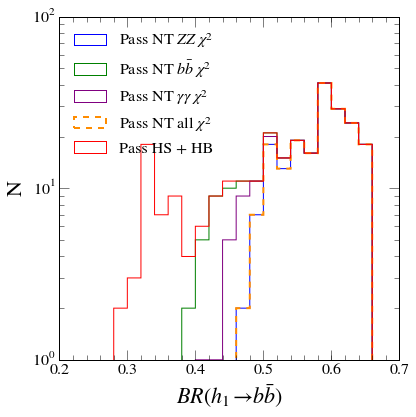

In [1244]:
plot_h1bb_NT_HSHB(df_pass_all, '', filename='Thesis_plots/h1bb_NT_HSHB.pdf')

In [1252]:
@save_fig
def plot_h1gluglu_NT_HSHB(df, title):
    df = df.query('122.2 < mh1 < 128.1 & mh2>128.1 & ma1<10.5')

    var = 'Brh1gg'
    xlim = [0.02, 0.12]
    nbins = 25
    lw = 1
    norm = False
    err = False
    
    pass_zz = ~df.constraints.str.contains('ZZ')
    plot_histogram(df=df[pass_zz], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$ZZ\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_bb = ~df.constraints.str.contains('bb')
    plot_histogram(ax=plt.gca(), df=df[pass_bb], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$b\bar{b}\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_gg = ~df.constraints.str.contains('gg')
    plot_histogram(ax=plt.gca(), df=df[pass_gg], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$\gamma\gamma\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm, color='purple')

    pass_nt = ~df.constraints.str.contains('chi2')
    plot_histogram(ax=plt.gca(), df=df[pass_nt], var=var, bins=nbins, range=xlim, 
                   label='Pass NT all '+r'$\chi^2$', histtype='step', linewidth=2*lw, 
                   errorbars=err, normed=norm, color='darkorange', linestyle='dashed')

    pass_HBHS = (df.HBresult==1) & (df.HSprob>0.05)
    plot_histogram(ax=plt.gca(), df=df[pass_HBHS], var=var, bins=nbins, range=xlim, 
                   label='Pass HS + HB', histtype='step', linewidth=lw, #linestyle='dashed',
                   errorbars=False, normed=norm)
    
    plt.xlim(*xlim)
    plt.xlabel(r'$BR(h_1 \to gg)$')
    plt.legend(loc='upper right', fontsize=16, frameon=False)
#     plt.ylim(1, 5E3)
    plt.yscale('log')

Setting backend pdf
Setting backend png


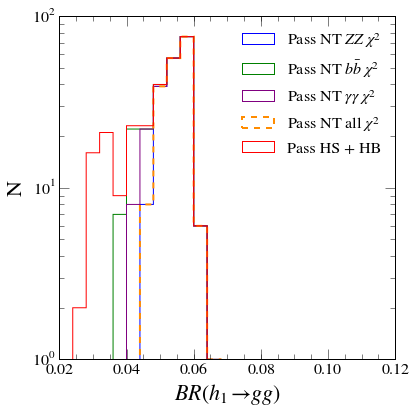

In [1253]:
plot_h1gluglu_NT_HSHB(df_pass_all, '', filename='Thesis_plots/h1gluglu_NT_HSHB.pdf')

In [1291]:
@save_fig
def plot_h1gammagamma_NT_HSHB(df, title):
    df = df.query('122.2 < mh1 < 128.1 & mh2>128.1 & ma1<10.5')

    var = 'Brh1gammagamma'
    xlim = [0, 0.005]
    nbins = 25
    lw = 1
    norm = False
    err = False
    
    pass_zz = ~df.constraints.str.contains('ZZ')
    plot_histogram(df=df[pass_zz], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$ZZ\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_bb = ~df.constraints.str.contains('bb')
    plot_histogram(ax=plt.gca(), df=df[pass_bb], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$b\bar{b}\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_gg = ~df.constraints.str.contains('gg')
    plot_histogram(ax=plt.gca(), df=df[pass_gg], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$\gamma\gamma\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm, color='purple')

    pass_nt = ~df.constraints.str.contains('chi2')
    plot_histogram(ax=plt.gca(), df=df[pass_nt], var=var, bins=nbins, range=xlim, 
                   label='Pass NT all '+r'$\chi^2$', histtype='step', linewidth=2*lw, 
                   errorbars=err, normed=norm, color='darkorange', linestyle='dashed')

    pass_HBHS = (df.HBresult==1) & (df.HSprob>0.05)
    plot_histogram(ax=plt.gca(), df=df[pass_HBHS], var=var, bins=nbins, range=xlim, 
                   label='Pass HS + HB', histtype='step', linewidth=lw, #linestyle='dashed',
                   errorbars=False, normed=norm)
    
    plt.xlim(*xlim)
    plt.xlabel(r'$BR(h_1 \to \gamma\gamma)$')
    plt.legend(loc='upper right', fontsize=16, frameon=False)
#     plt.ylim(1, 5E4)
    plt.yscale('log')

Setting backend pdf
Setting backend png


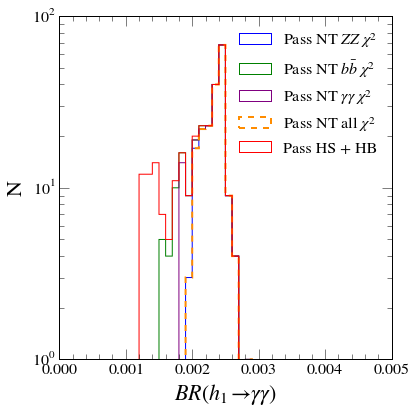

In [1249]:
plot_h1gammagamma_NT_HSHB(df_pass_all, '', filename='Thesis_plots/h1gammagamma_NT_HSHB.pdf')

In [1289]:
@save_fig
def plot_h1a1a1_NT_HSHB(df, title):
    
    df = df.query('122.1 < mh1 < 128.1 & mh2>128.1 & ma1<10.5')
    
    var = 'Brh1a1a1'
    nbins = 25
    xlim = [0, 0.75]
    norm = False
    lw = 1
    err = False
    
    pass_zz = ~df.constraints.str.contains('ZZ')
    plot_histogram(df=df[pass_zz], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$ZZ\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_bb = ~df.constraints.str.contains('bb')
    plot_histogram(ax=plt.gca(), df=df[pass_bb], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$b\bar{b}\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_gg = ~df.constraints.str.contains('gg')
    plot_histogram(ax=plt.gca(), df=df[pass_gg], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$\gamma\gamma\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm, color='purple')

    pass_nt = ~df.constraints.str.contains('chi2')
    plot_histogram(ax=plt.gca(), df=df[pass_nt], var=var, bins=nbins, range=xlim, 
                   label='Pass NT all '+r'$\chi^2$', histtype='step', linewidth=2*lw, 
                   errorbars=err, normed=norm, color='darkorange', linestyle='dashed')
    
    pass_HBHS = (df.HBresult==1) & (df.HSprob>0.05)
    plot_histogram(ax=plt.gca(), df=df[pass_HBHS], var=var, bins=nbins, range=xlim, 
                   label='Pass HS + HB', histtype='step', linewidth=lw, #linestyle='dashed',
                   errorbars=err, normed=norm, color='red')

    plt.xlim(*xlim)
    plt.xlabel(r'$BR(h_1 \to a_1a_1)$')
    plt.legend(loc='upper right', fontsize=16, frameon=False)
#     plt.ylim(1E-3, 1)
    plt.yscale('log')

Setting backend pdf
Setting backend png


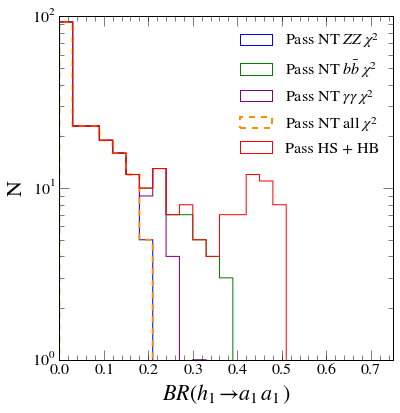

In [1290]:
plot_h1a1a1_NT_HSHB(df_pass_all, '', filename='Thesis_plots/h1a1a1_NT_HSHB.pdf')

In [1256]:
@save_fig
def plot_h1ww_NT_HSHB(df, title):
    
    df = df.query('122.1 < mh1 < 128.1 & mh2>128.1 & ma1<10.5')
    
    var = 'Brh1ww'
    nbins = 30
    xlim = [0, 0.3]
    norm = False
    lw = 1
    err = False
    
    pass_zz = ~df.constraints.str.contains('ZZ')
    plot_histogram(df=df[pass_zz], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$ZZ\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_bb = ~df.constraints.str.contains('bb')
    plot_histogram(ax=plt.gca(), df=df[pass_bb], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$b\bar{b}\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm)
    
    pass_gg = ~df.constraints.str.contains('gg')
    plot_histogram(ax=plt.gca(), df=df[pass_gg], var=var, bins=nbins, range=xlim, 
                   label='Pass NT '+r'$\gamma\gamma\ \chi^2$', histtype='step', linewidth=lw, 
                   errorbars=err, normed=norm, color='purple')

    pass_nt = ~df.constraints.str.contains('chi2')
    plot_histogram(ax=plt.gca(), df=df[pass_nt], var=var, bins=nbins, range=xlim, 
                   label='Pass NT all '+r'$\chi^2$', histtype='step', linewidth=2*lw, 
                   errorbars=err, normed=norm, color='darkorange', linestyle='dashed')
    
    pass_HBHS = (df.HBresult==1) & (df.HSprob>0.05)
    plot_histogram(ax=plt.gca(), df=df[pass_HBHS], var=var, bins=nbins, range=xlim, 
                   label='Pass HS + HB', histtype='step', linewidth=lw, #linestyle='dashed',
                   errorbars=err, normed=norm, color='red')

    plt.xlim(*xlim)
    plt.xlabel(r'$BR(h_1 \to WW)$')
    plt.legend(loc='upper left', fontsize=16, frameon=False)
#     plt.ylim(1E-3, 1)
    plt.yscale('log')

Setting backend pdf
Setting backend png


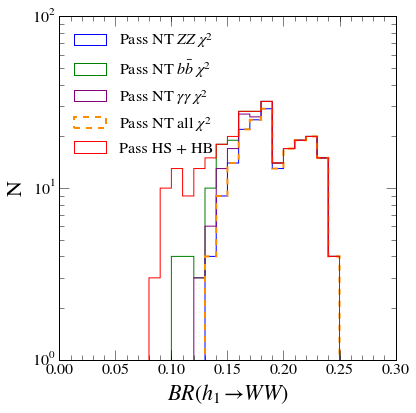

In [1257]:
plot_h1ww_NT_HSHB(df_pass_all.query('ma1<10.5'), '', filename='Thesis_plots/h1ww_NT_HSHB.pdf')

In [1198]:
help(pd.tools.plotting.scatter_matrix)

Help on function scatter_matrix in module pandas.tools.plotting:

scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)
    Draw a matrix of scatter plots.
    
    Parameters
    ----------
    frame : DataFrame
    alpha : float, optional
        amount of transparency applied
    figsize : (float,float), optional
        a tuple (width, height) in inches
    ax : Matplotlib axis object, optional
    grid : bool, optional
        setting this to True will show the grid
    diagonal : {'hist', 'kde'}
        pick between 'kde' and 'hist' for
        either Kernel Density Estimation or Histogram
        plot in the diagonal
    marker : str, optional
        Matplotlib marker type, default '.'
    hist_kwds : other plotting keyword arguments
        To be passed to hist function
    density_kwds : other plotting keyword arguments
        To be passed to kernel density estimate plot

In [1395]:
df = df_pass_all.query('HBresult==1 & HSprob>0.05')
cols = ['Brh1a1a1', 'Brh1zz', 'Brh1gammagamma', 'Brh1bb', 'Brh1ww', 'Brh1cc', 'Brh1gg', 'Brh1tautau']
df = df.query('122.1<mh1<128.1 & mh2>128.1 & ma1<10.5')[cols]
sss = df.sum(axis=1)

(array([ 15.,  19.,  22.,  22.,  30.,  34.,  19.,  17.,  10.,  13.,  10.,
          9.,   7.,   3.,   5.,  10.,  11.,  11.,   6.,   5.]),
 array([ 0.99752148,  0.99759229,  0.99766311,  0.99773393,  0.99780475,
         0.99787557,  0.99794639,  0.9980172 ,  0.99808802,  0.99815884,
         0.99822966,  0.99830048,  0.99837129,  0.99844211,  0.99851293,
         0.99858375,  0.99865457,  0.99872538,  0.9987962 ,  0.99886702,
         0.99893784]),
 <a list of 20 Patch objects>)

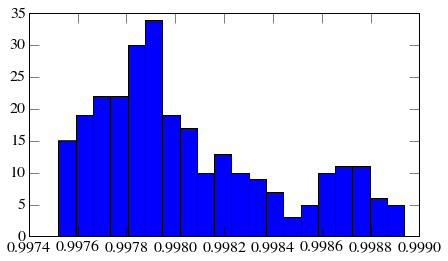

In [1397]:
plt.hist(sss.values, bins=20)

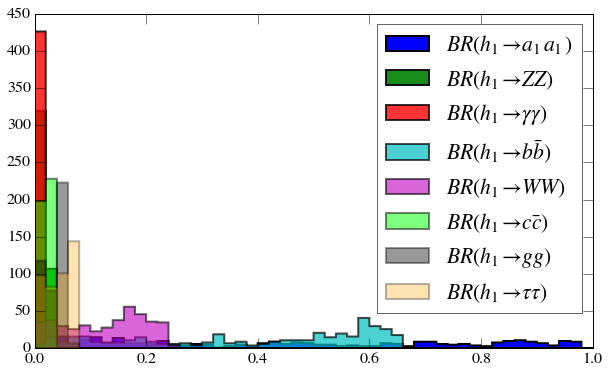

In [1425]:
df = df_pass_all
cols = ['Brh1a1a1', 'Brh1zz', 'Brh1gammagamma', 'Brh1bb', 'Brh1ww', 'Brh1cc', 'Brh1gg', 'Brh1tautau']
df = df.query('122.1<mh1<128.1 & mh2>128.1 & ma1<10.5')[cols]
cols_tex = [r'$BR(h_1\to a_1a_1)$', r'$BR(h_1\to ZZ)$', r'$BR(h_1\to \gamma\gamma)$', 
            r'$BR(h_1\to b\bar{b})$', r'$BR(h_1\to WW)$', r'$BR(h_1\to c\bar{c})$', 
            r'$BR(h_1\to gg)$', r'$BR(h_1\to \tau\tau)$']
df.columns = cols_tex
fig, ax = generate_fig_axes(size=[10,6])
colors = ["b","g","r","c","m","lime","k","orange"]
for i, v in enumerate(cols_tex):
    ax.hist(df[v].values, bins=50, range=[0,1], label=v, histtype='stepfilled', 
            color=colors[i], linestyle='solid', linewidth=2, alpha=1-(0.1*i))
plt.legend()
# plt.xscale('log')

In [1381]:
@save_fig
def plot_h1BR_corrs(df, title):
    cols = ['Brh1a1a1', 'Brh1zz', 'Brh1gammagamma', 'Brh1bb', 'Brh1ww', 'Brh1cc', 'Brh1gg', 'Brh1tautau']
    df = df.query('122.1<mh1<128.1 & mh2>128.1 & ma1<10.5')[cols]
    cols_tex = [r'$BR(h_1\to a_1a_1)$', r'$BR(h_1\to ZZ)$', r'$BR(h_1\to \gamma\gamma)$', 
                r'$BR(h_1\to b\bar{b})$', r'$BR(h_1\to WW)$', r'$BR(h_1\to c\bar{c})$', 
                r'$BR(h_1\to gg)$', r'$BR(h_1\to \tau\tau)$']
    df.columns = cols_tex
    pd.tools.plotting.scatter_matrix(df, figsize=[22, 22], alpha=0.7, grid=True, hist_kwds={'bins': 25}, color='red')
    plt.suptitle(title, y=0.93)

Setting backend png
Setting backend png


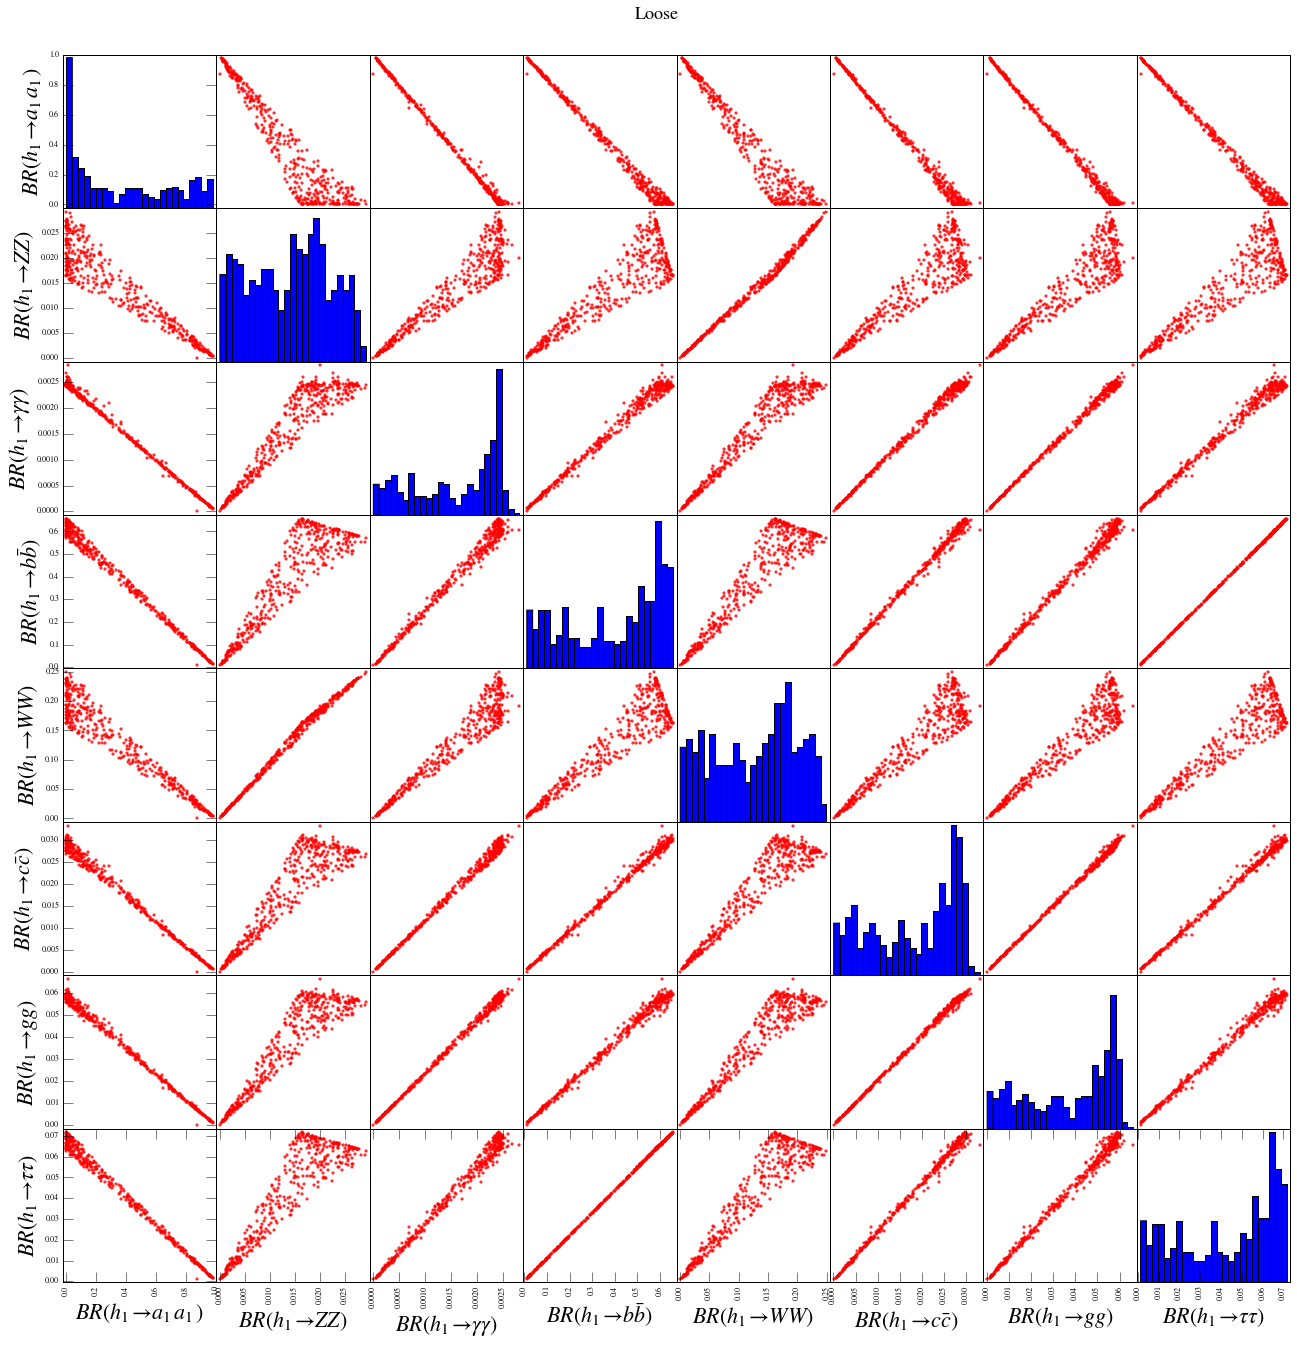

In [1426]:
plot_h1BR_corrs(df_pass_all, 'Loose', filename='Thesis_plots/h1br_corr_loose.png')

Setting backend png
Setting backend png


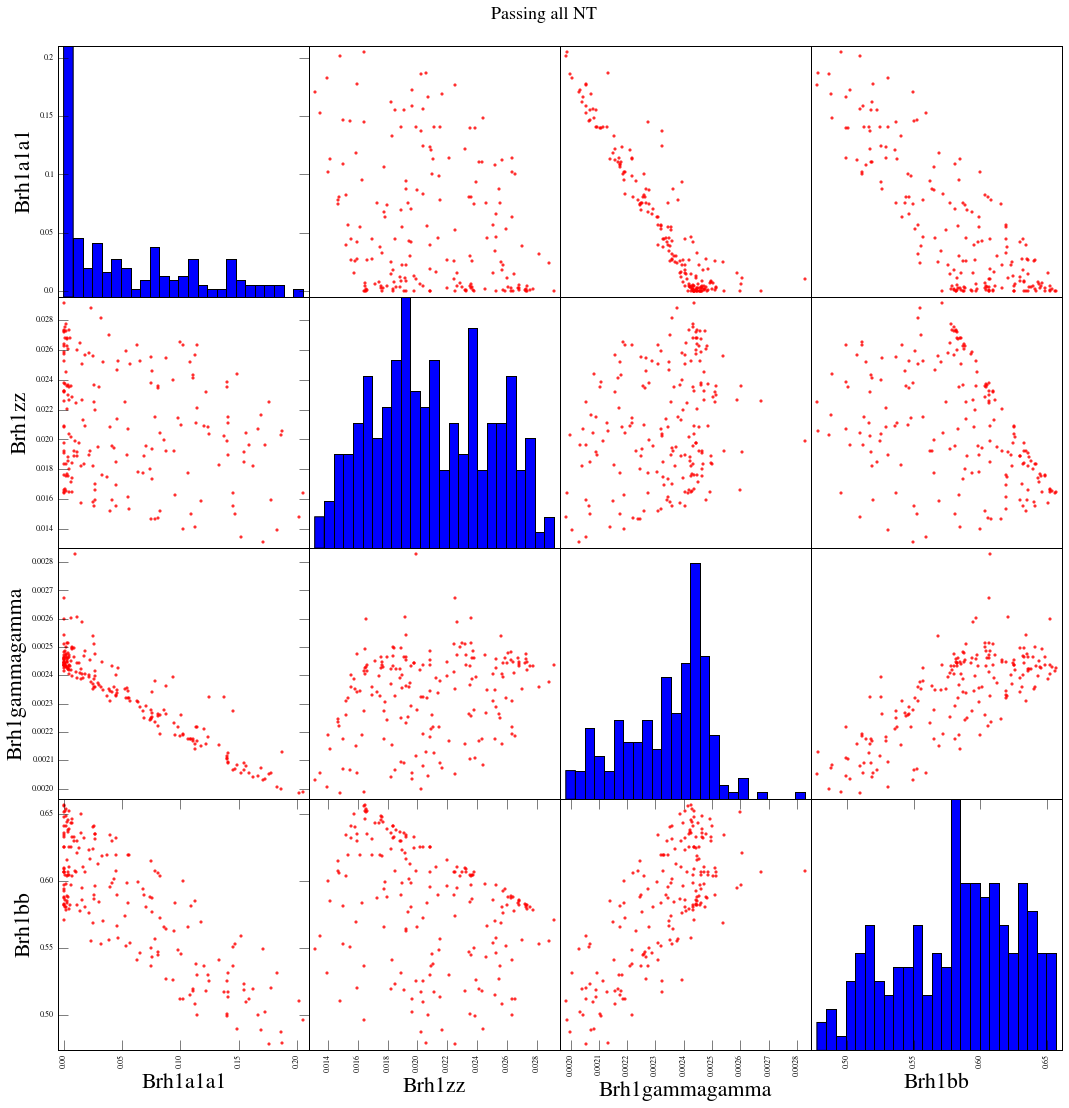

In [1285]:
plot_h1BR_corrs(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], 'Passing all NT', filename='Thesis_plots/h1br_corr_NT.png')

In [1427]:
df_pass_all[(~df_pass_all.constraints.str.contains('ZZ')) &(df_pass_all.constraints.str.contains('chi2'))].T

17939   \
Bra1bb                                                                                                                              0.907287   
Bra1cc                                                                                                                           0.000397695   
Bra1gg                                                                                                                            0.00268488   
Bra1mumu                                                                                                                         0.000313642   
Bra1ss                                                                                                                           0.000698275   
Bra1tautau                                                                                                                         0.0885228   
Brh1a1a1                                                                                                                            0.283839   
Brh1a1z                                                                                                                                  NaN   
Brh1bb                                                                                                                               0.39114   
Brh1cc                                                                                                                             0.0294785   
Brh1gammagamma                                                                                                                    0.00266129   
Brh1gg                                                                                                                             0.0591691   
Brh1mumu                                                                                                                         0.000147657   
Brh1tautau                                                                                                                         0.0417127   
Brh1ww                                                                                                                              0.172185   
Brh1zgamma                                                                                                                        0.00148493   
Brh1zz                                                                                                                             0.0178962   
Brh2a1a1                                                                                                                            0.828836   
Brh2a1z                                                                                                                          1.43162e-06   
Brh2bb                                                                                                                            0.00697097   
Brh2gammagamma                                                                                                                   7.61047e-06   
Brh2gg                                                                                                                           0.000116264   
Brh2h1h1                                                                                                                                 NaN   
Brh2tautau                                                                                                                       0.000851847   
Brh2ww                                                                                                                             0.0973887   
Brh2zgamma                                                                                                                       2.88372e-05   
Brh2zz                                                                                                                            0.00241982   
Del_a_mu                                                                                              

Setting backend png
Setting backend png


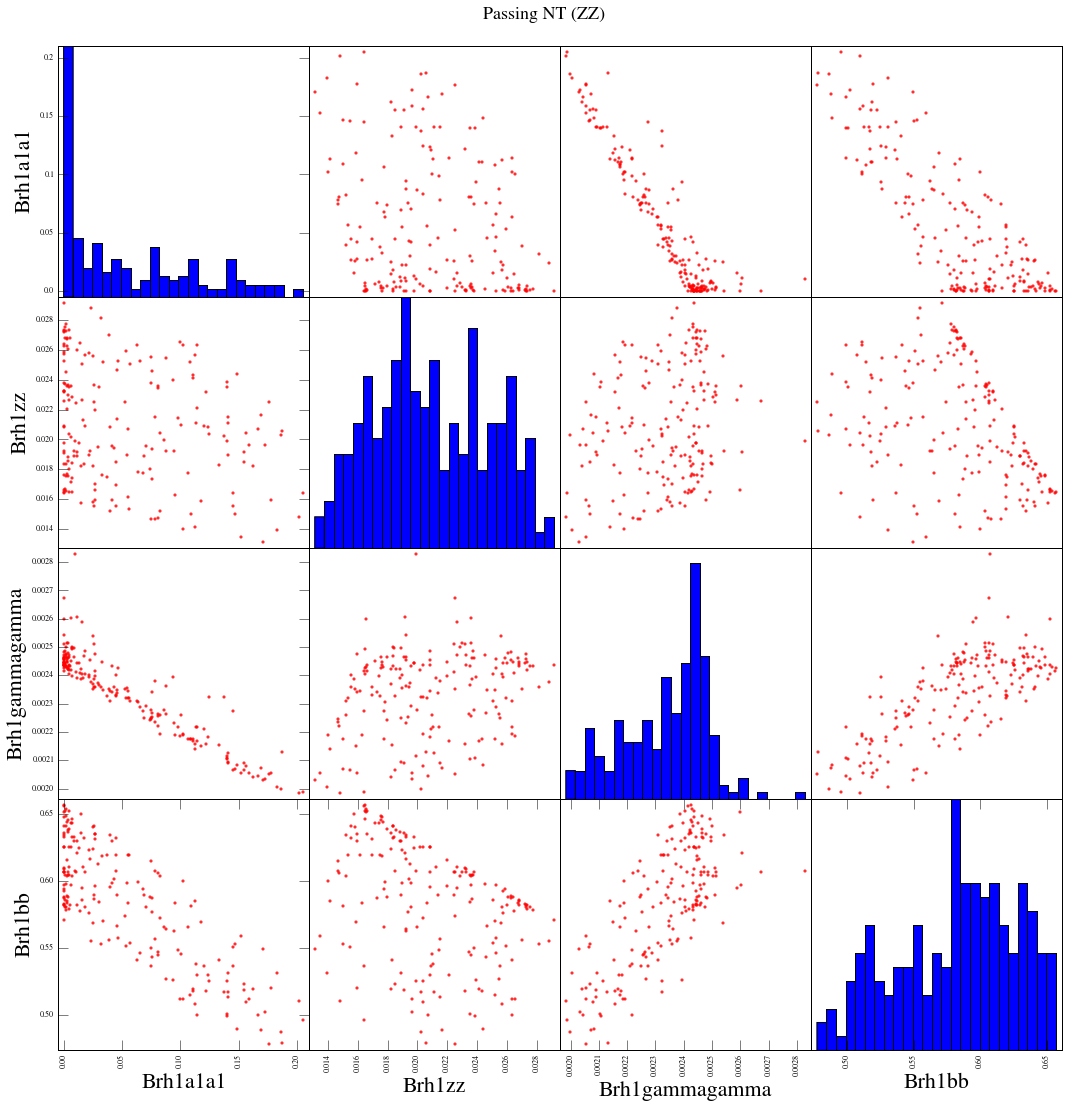

In [1286]:
plot_h1BR_corrs(df_pass_all[~df_pass_all.constraints.str.contains('ZZ')], 'Passing NT (ZZ)', filename='Thesis_plots/h1br_corr_NT_ZZ.png')

Setting backend png
Setting backend png


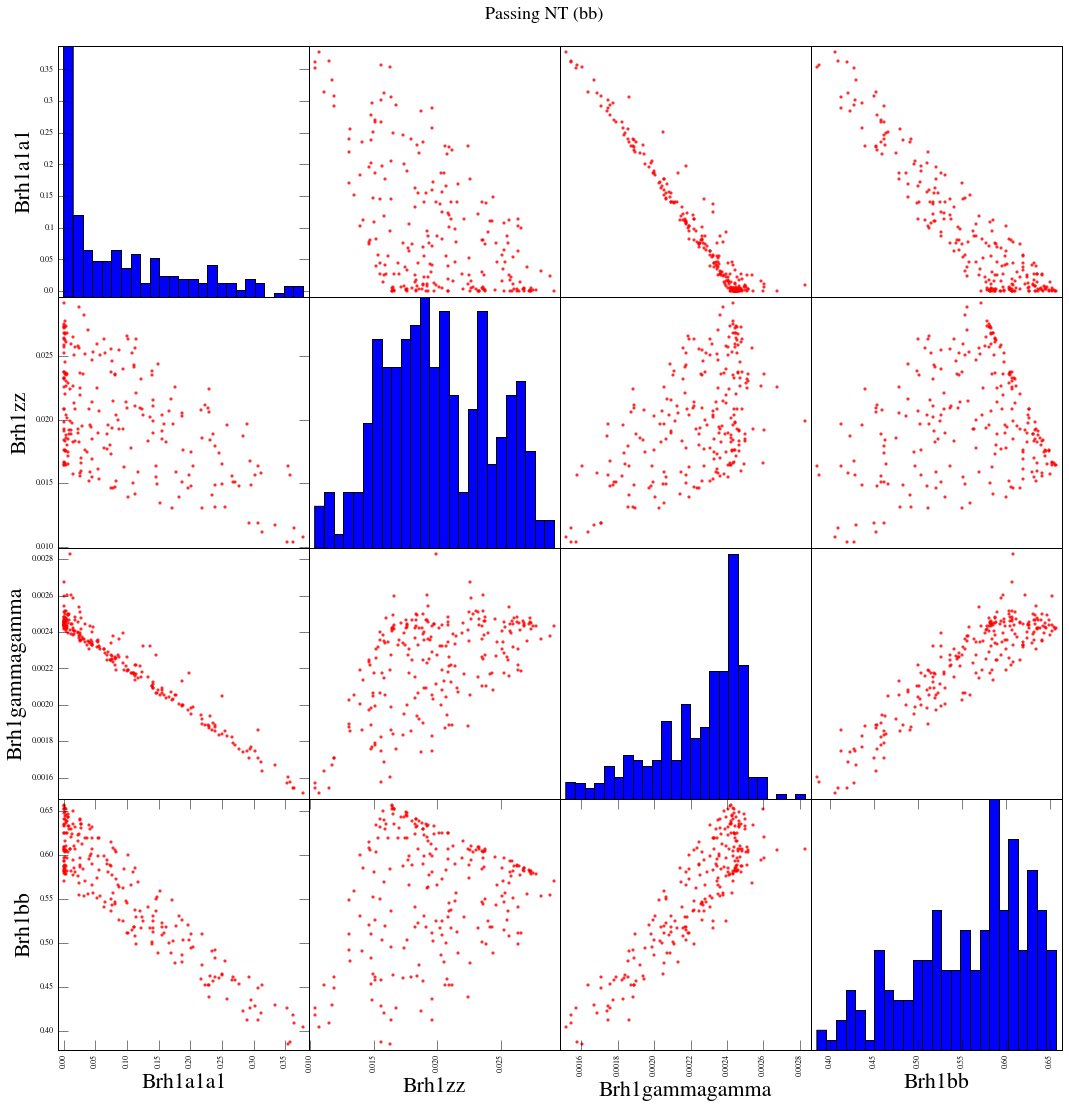

In [1287]:
plot_h1BR_corrs(df_pass_all[~df_pass_all.constraints.str.contains('bb')], 'Passing NT (bb)', filename='Thesis_plots/h1br_corr_NT_bb.png')

Setting backend png
Setting backend png


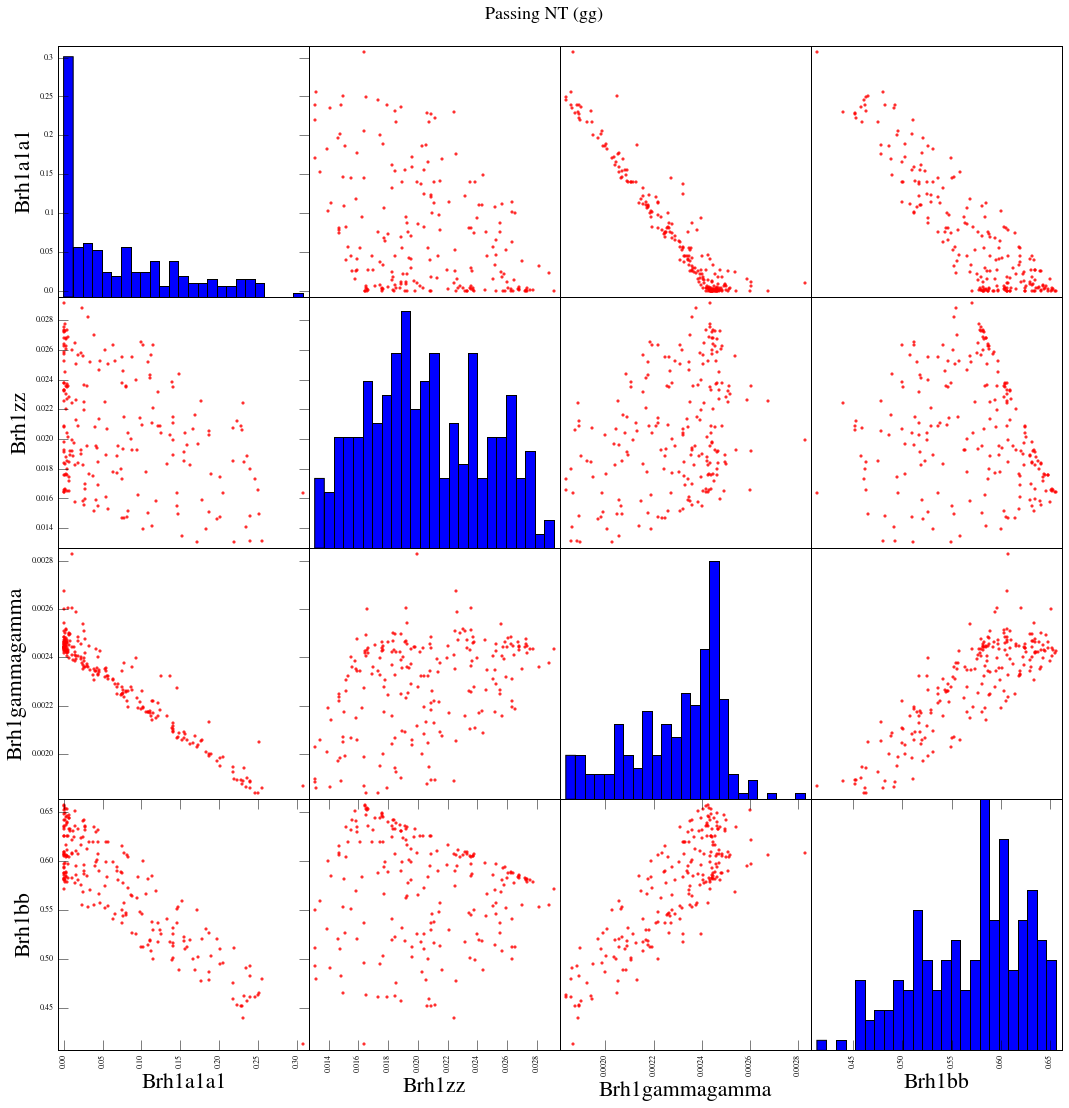

In [1288]:
plot_h1BR_corrs(df_pass_all[~df_pass_all.constraints.str.contains('gg')], 'Passing NT (gg)', filename='Thesis_plots/h1br_corr_NT_gg.png')

In [1148]:
@save_fig
def plot_bra1_ma1(df, title):
    fig, ax = generate_fig_axes()
    plot_scatter(ax = ax, df=df, xvar='ma1', yvar='Bra1tautau', color='green', label=r'$\tau\tau$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1mumu', color='red', label=r'$\mu\mu$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1bb', color='blue', label=r'$b\bar{b}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1cc', color='orange', label=r'$c\bar{c}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1ss', color='fuchsia', label=r'$s\bar{s}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='ma1', yvar='Bra1gg', color='purple', label=r'$gg$', s=SIZE)
    plt.xlim(0, 25)
    plt.ylim(1E-3, 1.2)
    plt.yscale('log')
    plt.legend(loc='lower right', fontsize=16, framealpha=0.85)
    plt.xlabel(r'$m_{a_1}\ \mathrm{[GeV]}$')
    plt.ylabel(r'$BR(a_1 \to XX)$')
    plt.tight_layout()

Setting backend png
Setting backend png


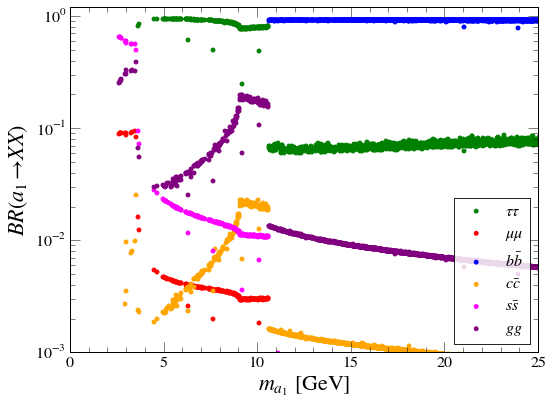

In [1149]:
plot_bra1_ma1(df_pass_all[~df_pass_all.constraints.str.contains('chi2')], title, filename='Thesis_plots/bra1_ma1.png')

In [1067]:
@save_fig
def plot_brh1_mh1(df, title):
    fig, ax = generate_fig_axes()
    plot_scatter(ax = ax, df=df, xvar='mh1', yvar='Brh1tautau', color='green', label=r'$\tau\tau$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='mh1', yvar='Brh1mumu', color='red', label=r'$\mu\mu$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='mh1', yvar='Brh1bb', color='blue', label=r'$b\bar{b}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='mh1', yvar='Brh1cc', color='orange', label=r'$c\bar{c}$', s=SIZE)
#     plot_scatter(ax=plt.gca(), df=df, xvar='mh1', yvar='Brh1ss', color='fuchsia', label=r'$s\bar{s}$', s=SIZE)
    plot_scatter(ax=plt.gca(), df=df, xvar='mh1', yvar='Brh1gg', color='purple', label=r'$gg$', s=SIZE)
    plt.xlim(0, 25)
    plt.ylim(1E-3, 1.2)
    plt.yscale('log')
    plt.legend(loc='best', fontsize=16, framealpha=0.85)
    plt.xlabel(r'$m_{h_1}\ \mathrm{[GeV]}$')
    plt.ylabel(r'$BR(h_1 \to XX)$')

Setting backend png
Setting backend png


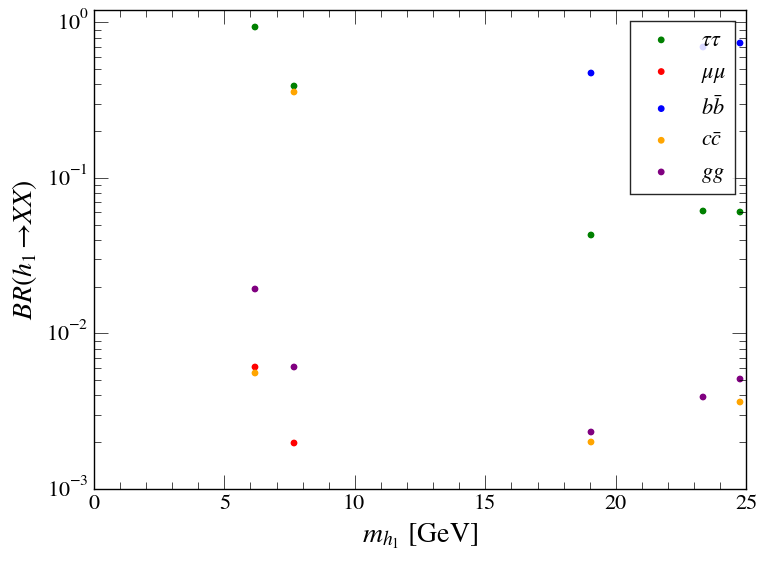

In [1068]:
plot_brh1_mh1(df_pass_all, title, filename='Thesis_plots/brh1_mh1.png')

(<matplotlib.axes._subplots.AxesSubplot at 0x1139ce4d0>,
 <matplotlib.collections.PathCollection at 0x10b9975d0>)

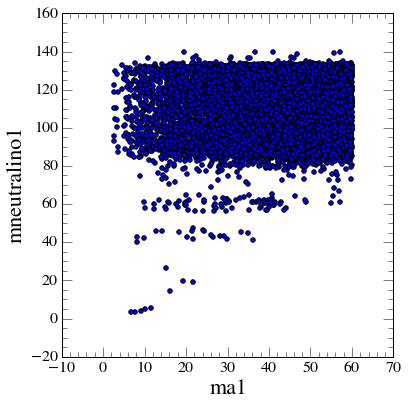

In [1306]:
plot_scatter(df=df_pass_all[~df_pass_all.constraints.str.contains('chi2')], xvar='ma1', yvar='mneutralino1')

(<matplotlib.axes._subplots.AxesSubplot at 0x1139d2350>,
 <matplotlib.collections.PathCollection at 0x1139cfc50>)

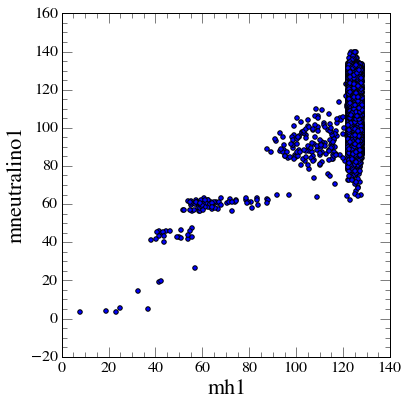

In [1307]:
plot_scatter(df=df_pass_all[~df_pass_all.constraints.str.contains('chi2')], xvar='mh1', yvar='mneutralino1')

(<matplotlib.axes._subplots.AxesSubplot at 0x1139d4e90>,
 <matplotlib.collections.PathCollection at 0x124de7950>)

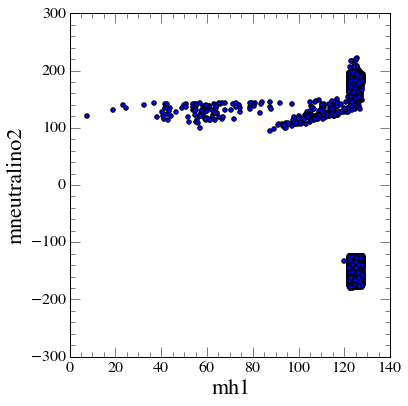

In [1308]:
plot_scatter(df=df_pass_all[~df_pass_all.constraints.str.contains('chi2')], xvar='mh1', yvar='mneutralino2')

(<matplotlib.axes._subplots.AxesSubplot at 0x1129cdb90>,
 <matplotlib.collections.PathCollection at 0x125d0a9d0>)

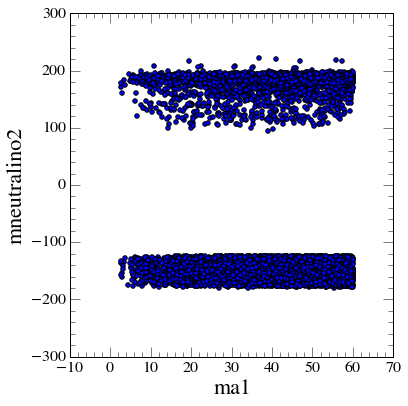

In [1309]:
plot_scatter(df=df_pass_all[~df_pass_all.constraints.str.contains('chi2')], xvar='ma1', yvar='mneutralino2')

In [1319]:
@save_fig
def plot_mass_corrs(df, title):
    cols = ['mh1', 'mh2', 'mh3', 'mhc', 'ma1', 'ma2', 'mneutralino1', 'mneutralino2', 'mstop1', 'mstop2', 'msbottom1', 'msbottom2', 'mgluino']
    df = df[cols]
    pd.tools.plotting.scatter_matrix(df, figsize=[20, 20], alpha=0.7, grid=True, hist_kwds={'bins': 25}, color='red')
    plt.suptitle(title, y=0.93)

Setting backend png
Setting backend png


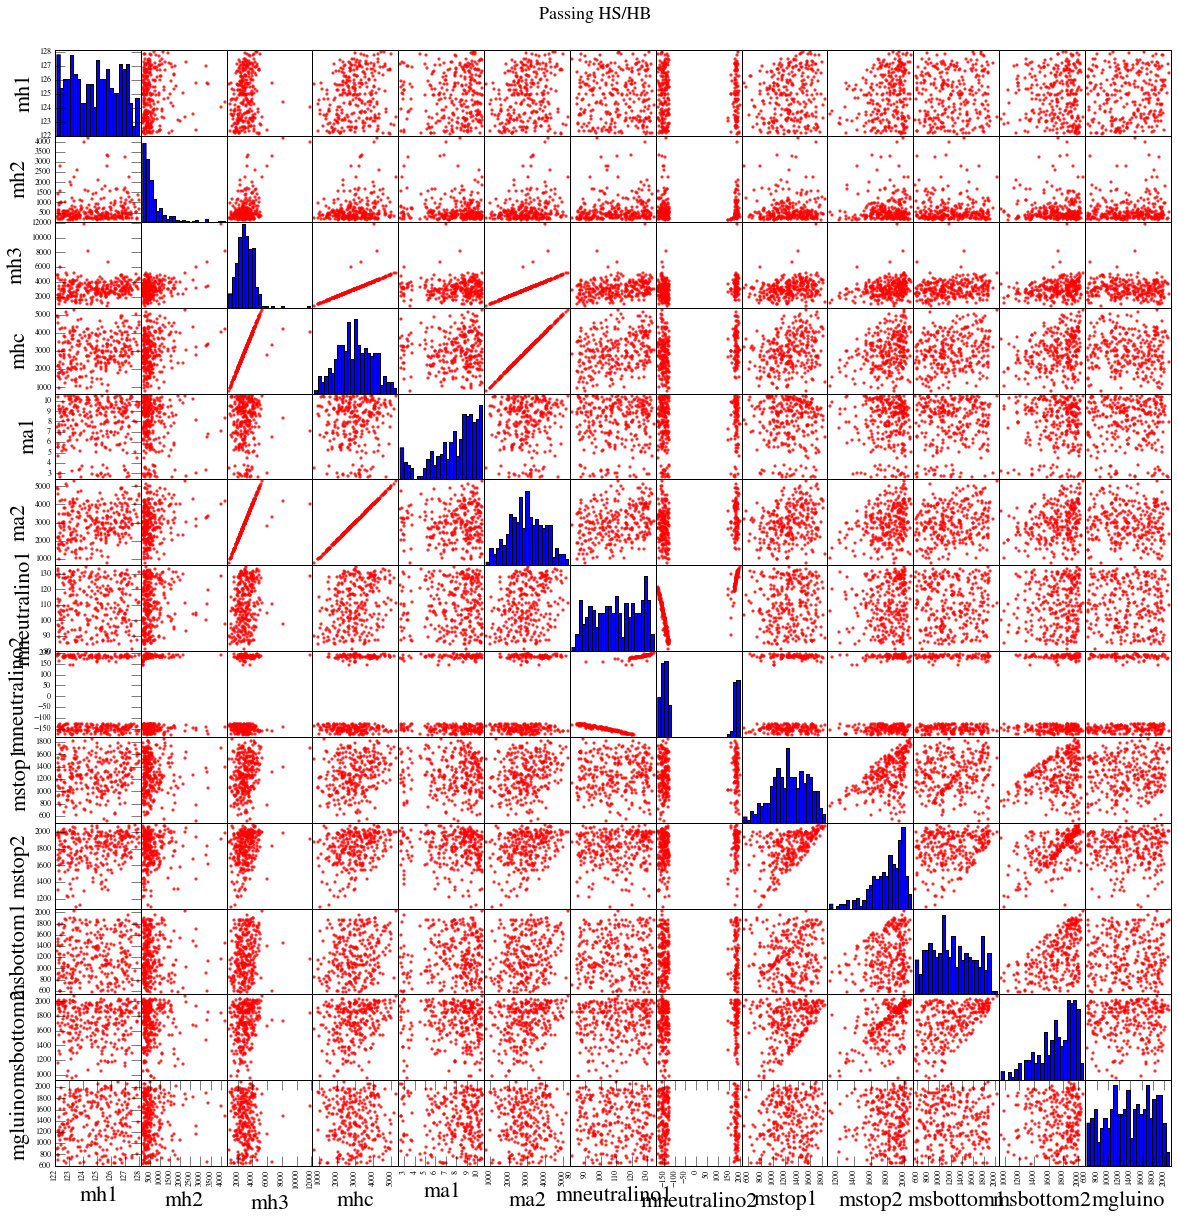

In [1321]:
plot_mass_corrs(df_pass_all.query('122.1<mh1<128.1 & mh2>128.1 & ma1<10.5 & HSprob>0.05 & HBresult==1'), 'Passing HS/HB', filename='Thesis_plots/mass_corr_HSHB_h1.png')

Setting backend png
Setting backend png


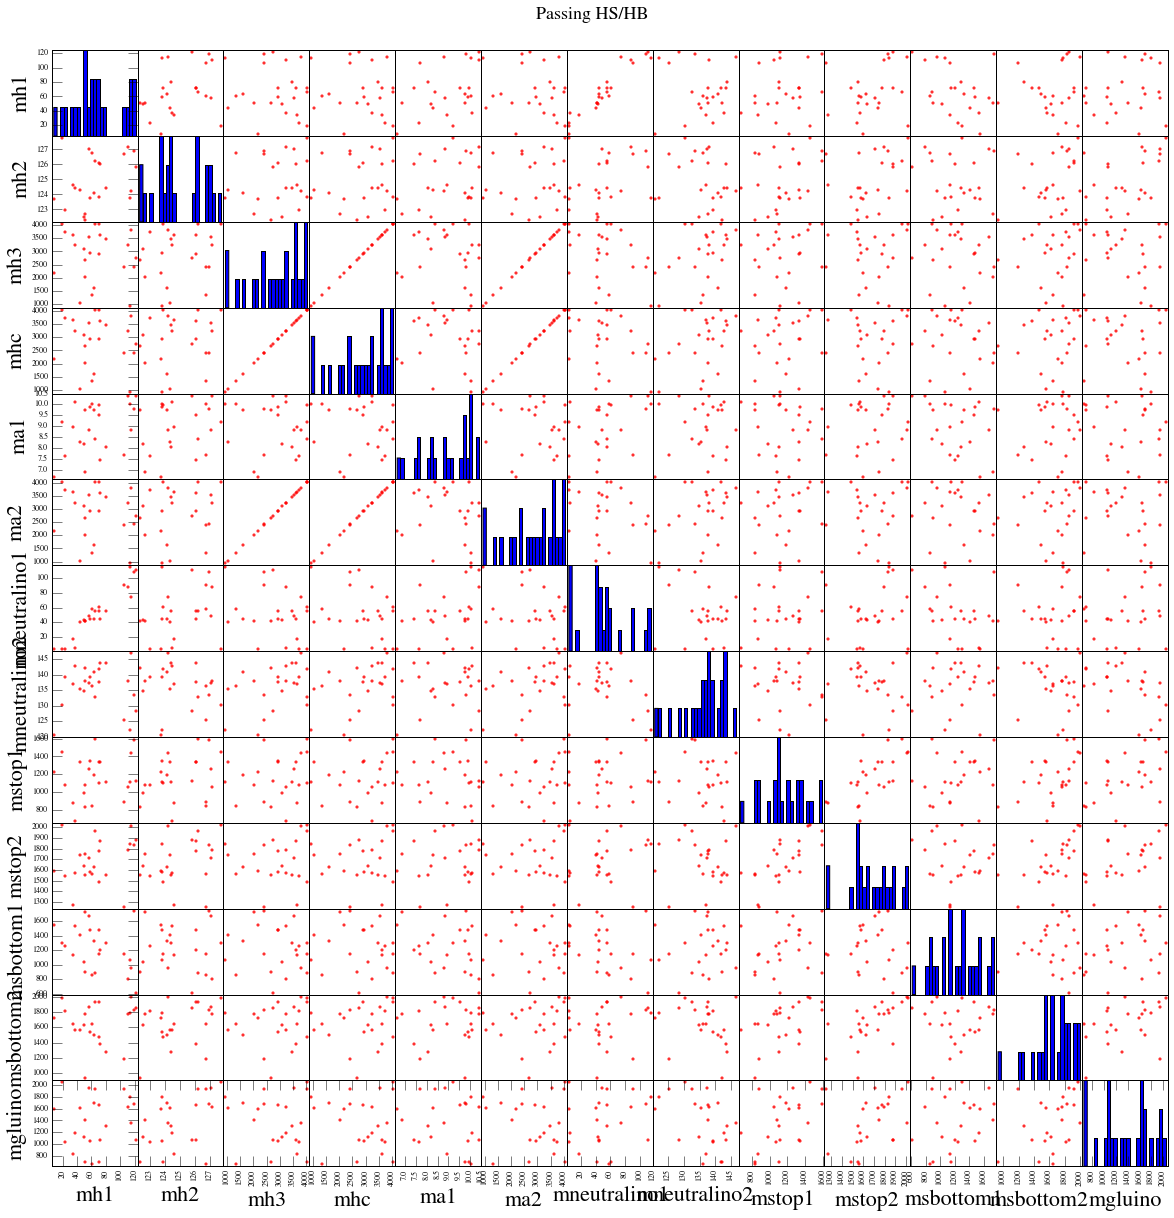

In [1320]:
plot_mass_corrs(df_pass_all.query('122.1<mh2<128.1 & mh1<122.1 & ma1<10.5 & HSprob>0.05 & HBresult==1'), 'Passing HS/HB', filename='Thesis_plots/mass_corr_HSHB_h2.png')

<matplotlib.colorbar.Colorbar instance at 0x12dbccfc8>

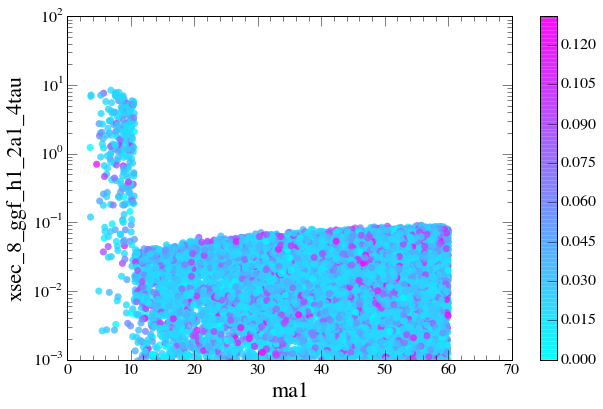

In [1540]:
fig, ax = generate_fig_axes(size=[9,6])
_, s = plot_scatter(ax=ax, df=df_pass_all.query('HSprob>0.05 & HBresult==1 & 0<omega<0.16'),
                    xvar='ma1', yvar='xsec_8_ggf_h1_2a1_4tau', marker='o', s=50,
                    c=df_pass_all.query('HSprob>0.05 & HBresult==1 & 0.<omega<0.16')['omega'].values, 
                    cmap=plt.get_cmap('cool'), alpha=0.8, linewidths=0)
plt.ylim(1E-3, 100)
plt.yscale('log')
fig.colorbar(s)
# fig.colorbar(s, label=r'$\tan\beta$')

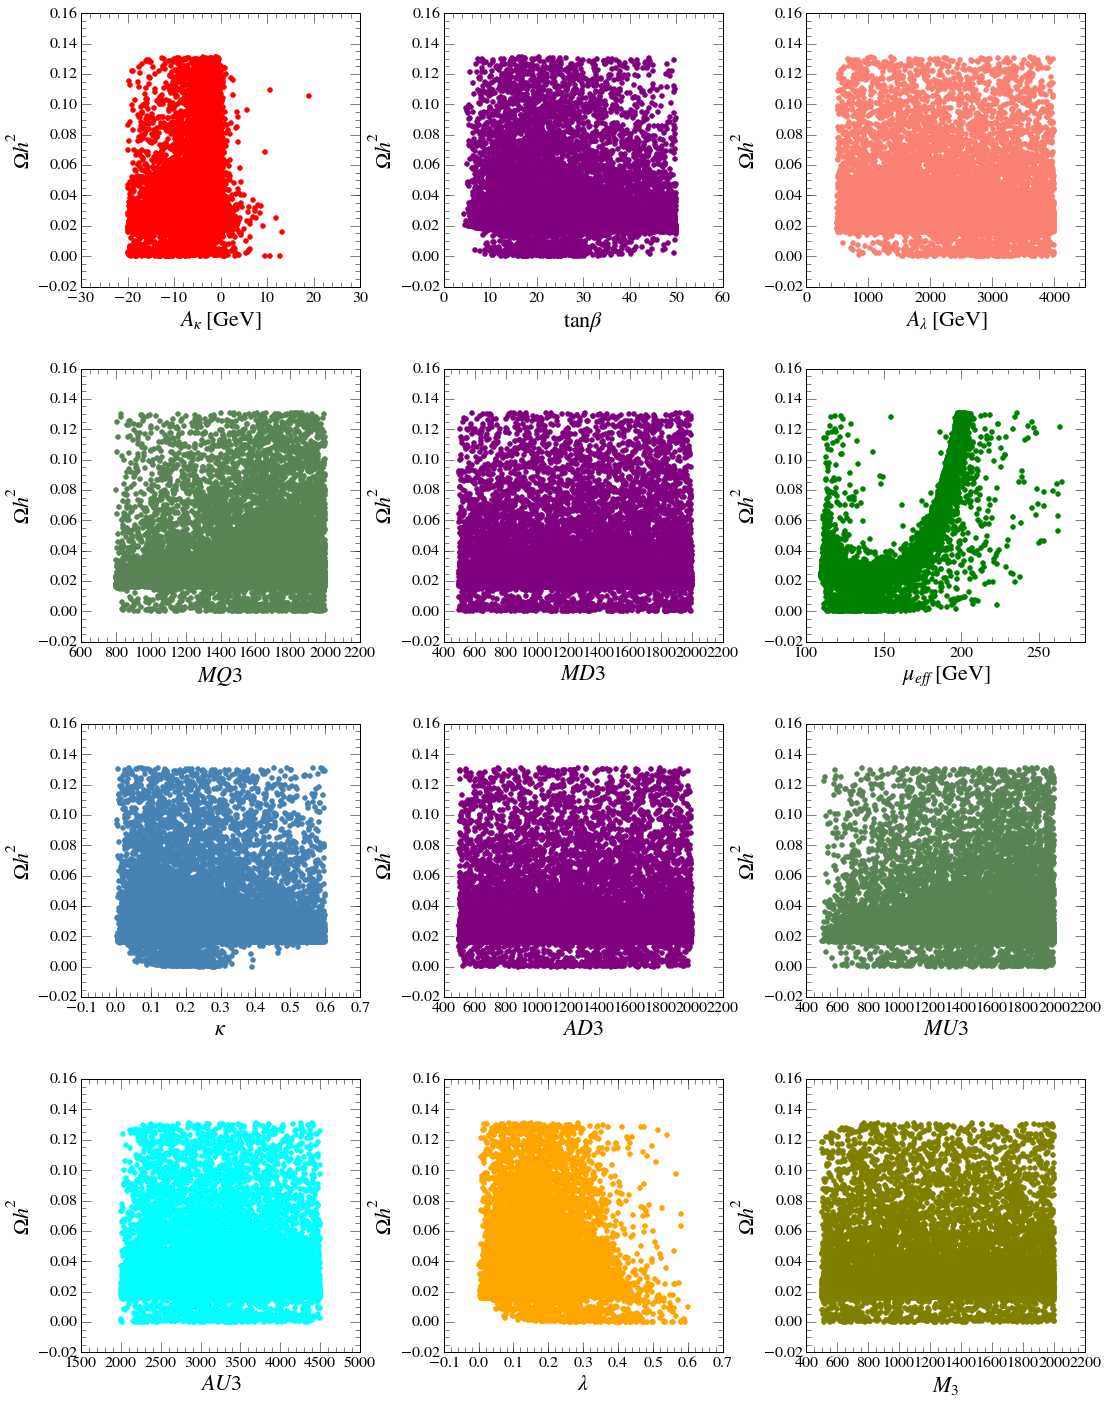

In [1546]:
plot_input_params_scatters(df=df_pass_all.query('HSprob>0.05 & HBresult==1 & 122.1<mh1<128.1 & mh2>128.1'),
                           yvar='omega', ylabel=r'$\Omega h^2$', param_dict=nmssm_params_extended)

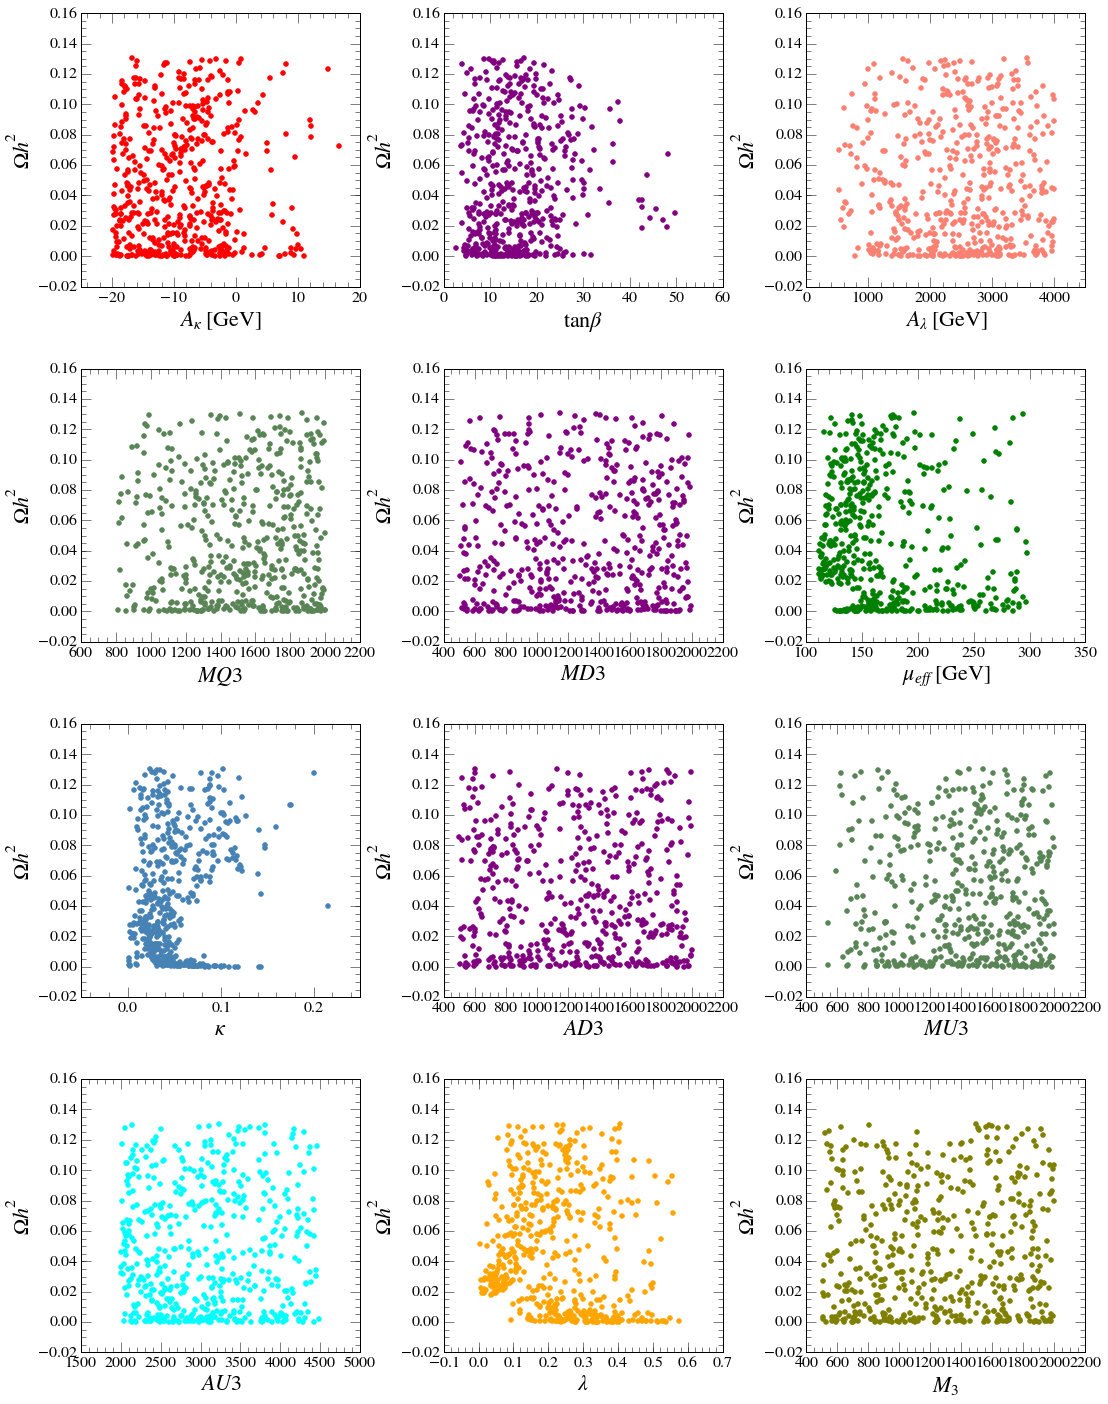

In [1553]:
plot_input_params_scatters(df=df_pass_all.query('HSprob>0.05 & HBresult==1 & 122.1<mh2<128.1 & mh1<122.1'),
                           yvar='omega', ylabel=r'$\Omega h^2$', param_dict=nmssm_params_extended)

(<matplotlib.axes._subplots.AxesSubplot at 0x1345796d0>,
 <matplotlib.collections.PathCollection at 0x1418b0350>)

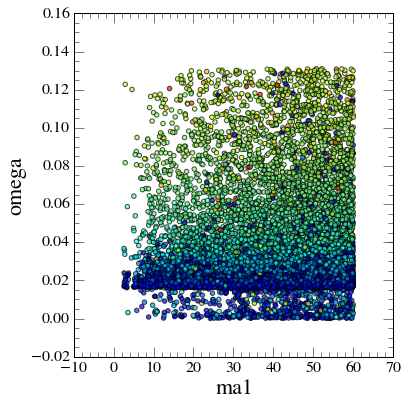

In [1559]:
plot_scatter(df=df_pass_all.query('HSprob>0.05 & HBresult==1 & 122.1<mh1<128.1 & mh2>128.1'), 
             yvar='omega', xvar='ma1', alpha=0.7, 
             c=df_pass_all.query('HSprob>0.05 & HBresult==1 & 122.1<mh1<128.1 & mh2>128.1').mueff.values)

(<matplotlib.axes._subplots.AxesSubplot at 0x13b60f9d0>,
 <matplotlib.collections.PathCollection at 0x132755c10>)

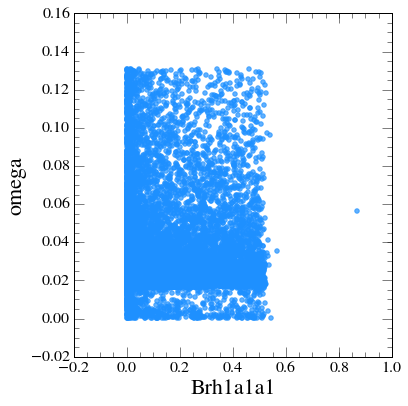

In [1551]:
plot_scatter(df=df_pass_all.query('HSprob>0.05 & HBresult==1 & 122.1<mh1<128.1 & mh2>128.1'), 
             yvar='omega', xvar='Brh1a1a1', alpha=0.7, color='dodgerblue')

(<matplotlib.axes._subplots.AxesSubplot at 0x141b8a5d0>,
 <matplotlib.collections.PathCollection at 0x133e1f3d0>)

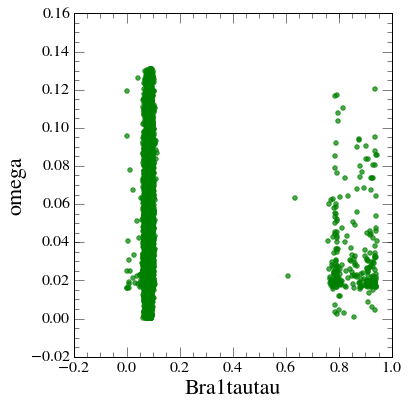

In [1552]:
plot_scatter(df=df_pass_all.query('HSprob>0.05 & HBresult==1 & 122.1<mh1<128.1 & mh2>128.1'), 
             yvar='omega', xvar='Bra1tautau', alpha=0.7, color='green')

(<matplotlib.axes._subplots.AxesSubplot at 0x13b5d3dd0>,
 <matplotlib.collections.PathCollection at 0x133155b90>)

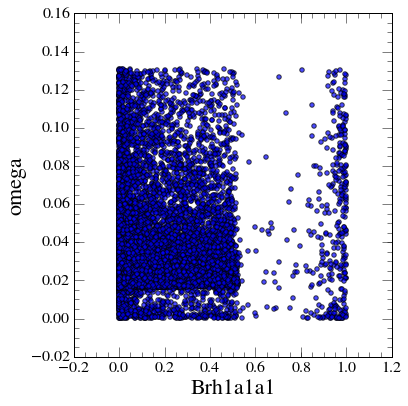

In [1548]:
plot_scatter(df=df_pass_all.query('HSprob>0.05 & HBresult==1'), yvar='omega', xvar='Brh1a1a1', alpha=0.7)

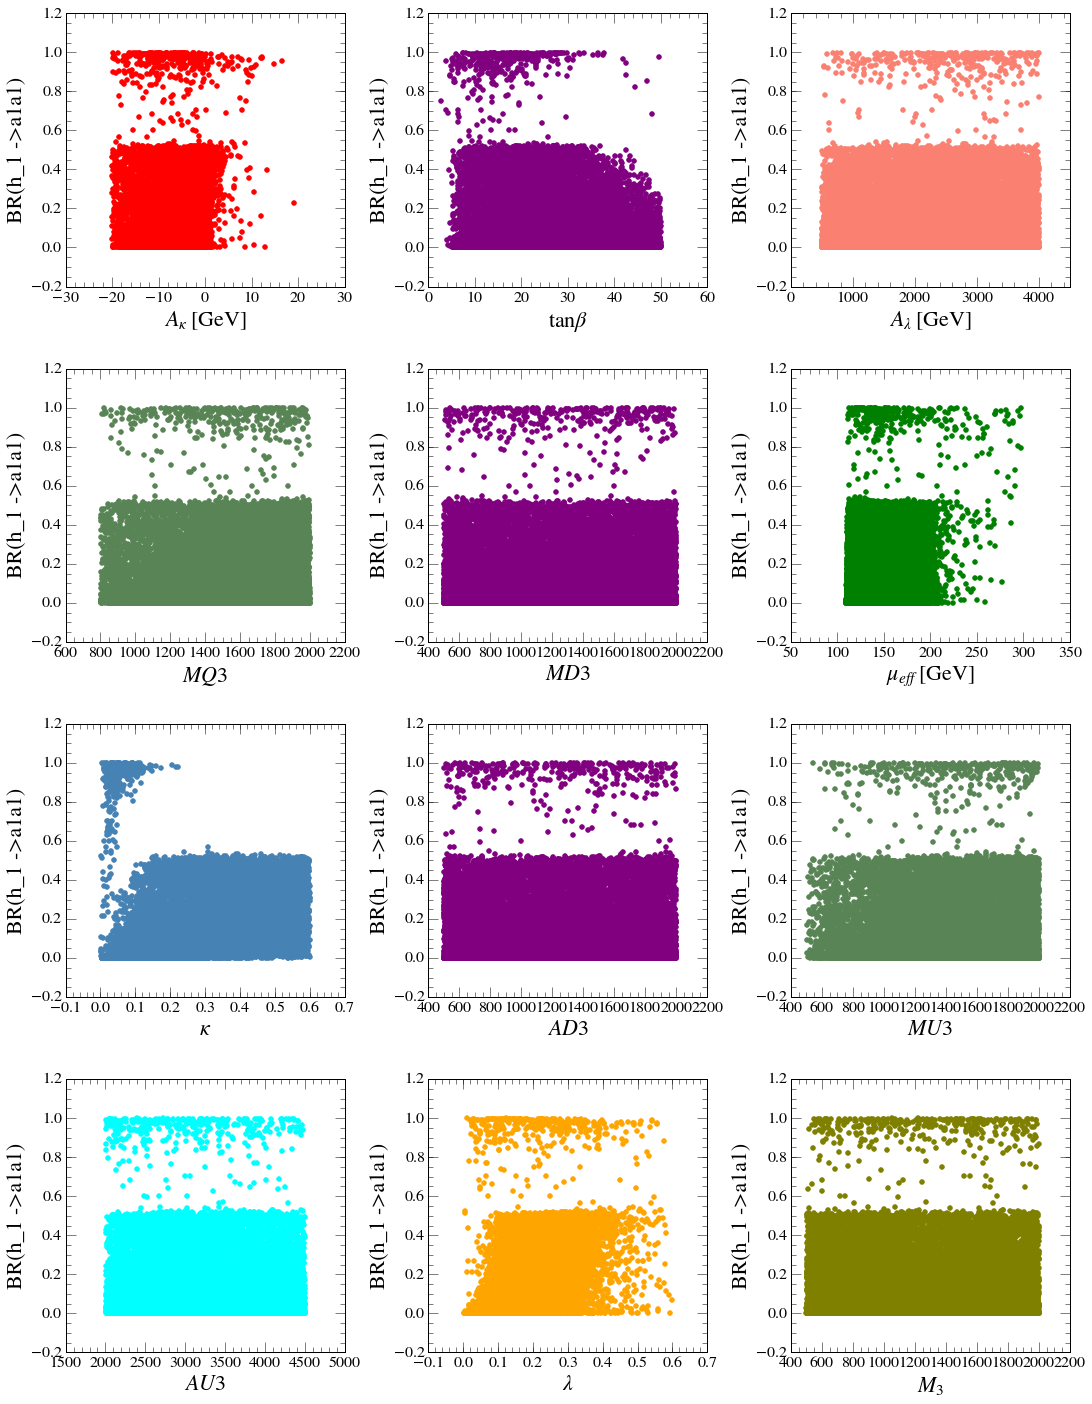

In [1544]:
plot_input_params_scatters(df=df_pass_all.query('HSprob>0.05 & HBresult==1'),
                           yvar='Brh1a1a1', ylabel='BR(h_1 ->a1a1)', param_dict=nmssm_params_extended)

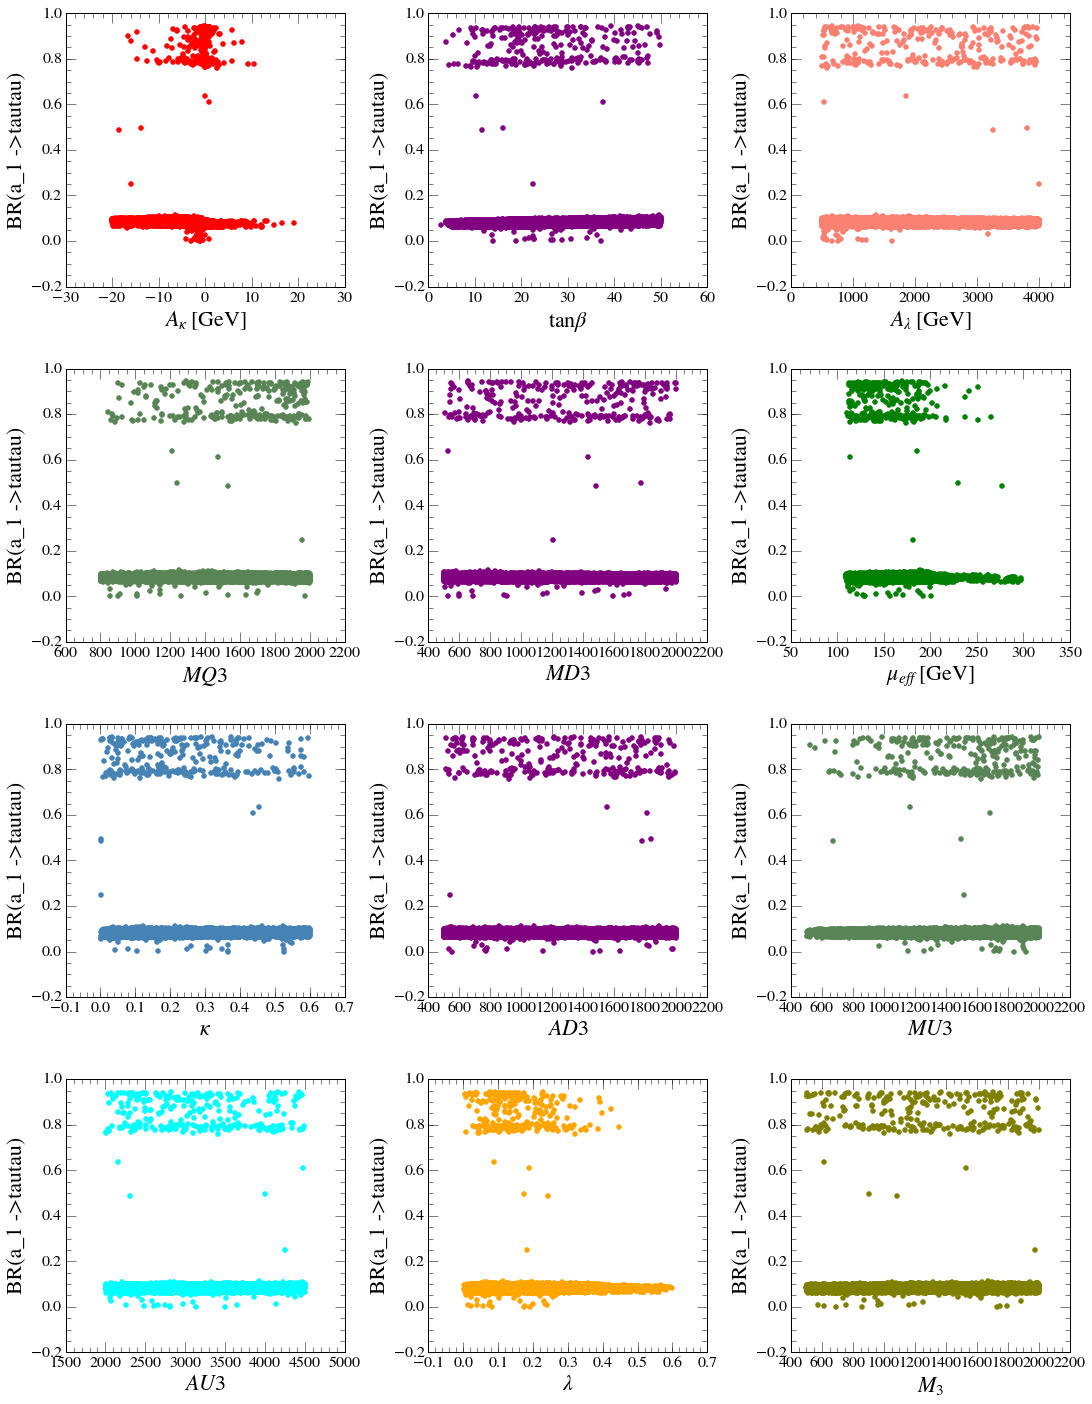

In [1545]:
plot_input_params_scatters(df=df_pass_all.query('HSprob>0.05 & HBresult==1'),
                           yvar='Bra1tautau', ylabel='BR(a_1 ->tautau)', param_dict=nmssm_params_extended)

In [1428]:
azz=43.29
bzz=4.91
czz=9.61
mugcenzz=1.07
muvcenzz=1.23

def chi2zz(ggf_vv, vh_vv):
    return azz*(ggf_vv-mugcenzz)**2+czz*(vh_vv-muvcenzz)**2+2*bzz*(ggf_vv-mugcenzz)*(vh_vv-muvcenzz)

In [1493]:
ggf_vv = np.arange(0, 1.9, 0.01)
vh_vv = np.arange(0, 1.9, 0.01)

chi2 = np.empty([len(ggf_vv), len(vh_vv)])
for i, x in enumerate(ggf_vv):
    for j, y in enumerate(vh_vv):
        chi2[i,j] = chi2zz(x, y)

In [1450]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    -----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be a float
        array, a uint8 array or a PIL image. If `X` is an array, it
        can have the following shapes:
    
        - MxN -- luminance (grayscale, float array only)
        - MxNx3 -- RGB (float or uint8 array)
        - MxNx4 -- RGBA (float or uint8 array)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0; MxN float arrays may be
        normalised.
    
    cmap : `~matplotlib.colors.Colormap`, optional, default: None
        If None, default to r

1.07 1.23


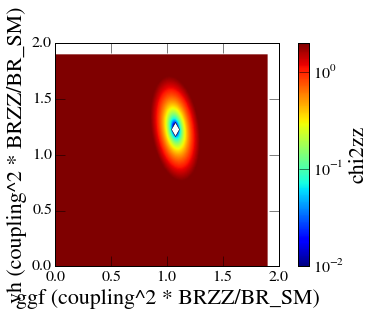

In [1504]:
plt.imshow(chi2.T, interpolation=None, origin='lower', 
#            cmap=plt.get_cmap('summer'), 
           norm=mpl.colors.LogNorm(vmin=0.01, vmax=100),
           extent=[ggf_vv.min(), ggf_vv.max(), vh_vv.min(), vh_vv.max()],
           vmin=0.01, vmax=2)
plt.colorbar(label='chi2zz')

plt.xlabel('ggf (coupling^2 * BRZZ/BR_SM)')
plt.ylabel('vh (coupling^2 * BRZZ/BR_SM)')
min_x_ind, min_y_ind = np.unravel_index(chi2.argmin(), chi2.shape)
print ggf_vv[min_x_ind], vh_vv[min_y_ind]
plt.plot(ggf_vv[min_x_ind], vh_vv[min_y_ind], 'd', c='white', markersize=10)
# print plt.xticks
# plt.gca().set_xticks(ggf_vv)

(0.4, 1.2)

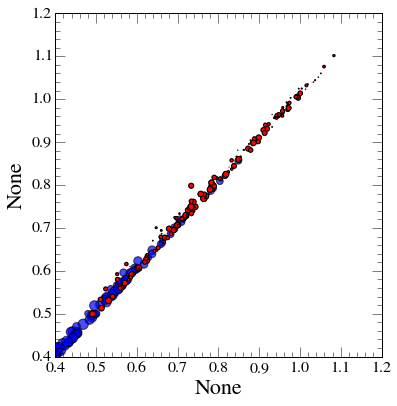

In [1538]:
df = df_pass_all.query('122.1<mh1<128.1 & mh2>128.1 & ma1<10.5')
brzzsm = 2.619E-02
plot_scatter(yarray=(df.h1vvrc2*df.Brh1zz/brzzsm).values, 
             xarray=(df.h1ggrc2*df.Brh1zz/brzzsm).values, 
             c='blue', s=200.*df.Brh1a1a1, alpha=0.7)
plot_scatter(ax=plt.gca(), 
             xarray=(df[~df.constraints.str.contains('ZZ')].h1ggrc2*df[~df.constraints.str.contains('ZZ')].Brh1zz/brzzsm).values, 
             yarray=(df[~df.constraints.str.contains('ZZ')].h1vvrc2*df[~df.constraints.str.contains('ZZ')].Brh1zz/brzzsm).values, 
             c='red', s=200.*df[~df.constraints.str.contains('ZZ')].Brh1a1a1)
plt.xlim(0.4, 1.2)
plt.ylim(0.4, 1.2)

In [ ]:
plot_histogram(df=df_pass_all)